In [136]:
'''from google.colab import drive
drive.mount('/content/drive')'''

"from google.colab import drive\ndrive.mount('/content/drive')"

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns
import datetime
import matplotlib as mpl
fp = mpl.font_manager.FontProperties(family='Tahoma',size=13)

%matplotlib inline

# Import Data

แปลง DOB และ System Car Code Date ให้เป็น วัน

In [2]:
df = pd.read_excel('Data20230120.xlsx', parse_dates=['DOB','System CAR Code Date'])
df.head()

Application Number  Principal Approve Amount  Principal Amount  \
0  25651226INSI00001                    7500.0              0.00   
1  25650620ULMB00004                   20000.0          13492.22   
2  25650620ULCR00002                  130000.0         125931.40   
3  25650621ULMB00001                   70000.0          60867.83   
4  25650621ULMB00011                    3000.0           1585.66   

   Repayment Tenor Month Number Gender        DOB Occupation Description  \
0                            12      M 1992-12-05          พนักงานบริษัท   
1                            12      M 1986-08-15                  อื่นๆ   
2                            60      F 1996-04-30                  อื่นๆ   
3                            36      M 1979-04-01                  อื่นๆ   
4                            13      M 1967-05-04          STREET VENDOR   

   Total Income Amount (Month) Collateral Type Code Vehicle Brand  \
0                     10000.00                   PU        TOYOTA   
1                     25000.09                   MC         HONDA   
2                     15000.00                  CAR         HONDA   
3                     20000.00                   MC        YAMAHA   
4                     30000.00                   MC         HONDA   

   Vehicle Model  Vehicle Release Year Vehicle Sub Model  Evaluation Amount  \
0  SPORT CRUISER                  2002                EP             225500   
1        PCX 160                  2018                BV              64500   
2          CIVIC                  2005                DK             220500   
3      N-MAX 155                  2021                CE              81500   
4     WAVE 125 I                  2010                AY              20000   

  System CAR Code (Daily) System CAR Code Date Final CAR Code Previous Month  \
0                      S1           2022-12-26                            S1   
1                      S1           2022-06-20                            S1   
2                      S1           2022-06-20                            S1   
3                      S1           2022-06-21                            S1   
4                      S1           2022-06-21                            S1   

   Day Past Due (Aging)     Application Status  
0                     4  APPLICATION_COMPLETED  
1                     0  APPLICATION_COMPLETED  
2                     0  APPLICATION_COMPLETED  
3                     0  APPLICATION_COMPLETED  
4                     0  APPLICATION_COMPLETED

In [3]:
# df['%LTV'] = df['Principal Approve Amount']/df['Evaluation Amount']*100
# df.head()

In [4]:
df.rename(columns={'Day Past Due (Aging)':'DPD'}, inplace=True)
df['age'] = pd.to_datetime('today').year - df.DOB.dt.year

In [5]:
print(df.shape)
df.tail()

(53496, 20)


Application Number  Principal Approve Amount  Principal Amount  \
53491  25651231ULMB00013                   40000.0          37993.41   
53492  25651231REUC00010                  140000.0         140000.00   
53493  25651231REUM00003                   61800.0          61800.00   
53494  25651230REUC00088                  180000.0         180000.00   
53495  25651231REUC00011                  123000.0         123000.00   

       Repayment Tenor Month Number Gender        DOB Occupation Description  \
53491                            24      M 1977-02-25                เกษตรกร   
53492                            60      M 1965-06-30                เกษตรกร   
53493                            36      F 1983-11-21          STREET VENDOR   
53494                            60      M 1974-07-28     พนักงานรัฐวิสาหกิจ   
53495                            60      M 1990-10-15                  อื่นๆ   

       Total Income Amount (Month) Collateral Type Code Vehicle Brand  \
53491                      60000.0                   MC         HONDA   
53492                      24500.0                   PU         ISUZU   
53493                      45000.0                   MC         HONDA   
53494                      32000.0                   PU         MAZDA   
53495                      60000.0                  CAR         HONDA   

      Vehicle Model  Vehicle Release Year Vehicle Sub Model  \
53491    WAVE 125 I                  2022                CP   
53492         D-MAX                  2006                CU   
53493       PCX 160                  2021                BQ   
53494      BT-50PRO                  2012                AL   
53495          JAZZ                  2005                BJ   

       Evaluation Amount System CAR Code (Daily) System CAR Code Date  \
53491              53000                      S1           2022-12-31   
53492             176000                      S1           2022-12-31   
53493              82500                      S1           2022-12-31   
53494             280000                      S1           2022-12-31   
53495             164000                      S1           2022-12-31   

      Final CAR Code Previous Month  DPD     Application Status  age  
53491                            S1    0  APPLICATION_COMPLETED   46  
53492                            S1    0  APPLICATION_COMPLETED   58  
53493                            S1    0  APPLICATION_COMPLETED   40  
53494                            S1    0  APPLICATION_COMPLETED   49  
53495                            S1    0  APPLICATION_COMPLETED   33

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53496 entries, 0 to 53495
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Application Number             53496 non-null  object        
 1   Principal Approve Amount       53496 non-null  float64       
 2   Principal Amount               53496 non-null  float64       
 3   Repayment Tenor Month Number   53496 non-null  int64         
 4   Gender                         53496 non-null  object        
 5   DOB                            53496 non-null  datetime64[ns]
 6   Occupation Description         53496 non-null  object        
 7   Total Income Amount (Month)    53496 non-null  float64       
 8   Collateral Type Code           53496 non-null  object        
 9   Vehicle Brand                  53496 non-null  object        
 10  Vehicle Model                  53496 non-null  object        
 11  Vehicle Release

In [10]:
df.isna().sum()

Application Number               0
Principal Approve Amount         0
Principal Amount                 0
Repayment Tenor Month Number     0
Gender                           0
DOB                              0
Occupation Description           0
Total Income Amount (Month)      0
Collateral Type Code             0
Vehicle Brand                    0
Vehicle Model                    0
Vehicle Release Year             0
Vehicle Sub Model                0
Evaluation Amount                0
System CAR Code (Daily)          0
System CAR Code Date             0
Final CAR Code Previous Month    0
DPD                              0
Application Status               0
age                              0
dtype: int64

# Data Preparation

## Data Cleansing

In [11]:
df.describe()

Principal Approve Amount  Principal Amount  \
count              5.349600e+04      5.349600e+04   
mean               1.016408e+05      9.874629e+04   
std                1.016980e+05      1.011526e+05   
min                3.000000e+03     -2.253340e+03   
25%                2.600000e+04      2.490000e+04   
50%                4.800000e+04      4.088499e+04   
75%                1.650000e+05      1.600000e+05   
max                2.000000e+06      2.000000e+06   

       Repayment Tenor Month Number  Total Income Amount (Month)  \
count                  53496.000000                 5.349600e+04   
mean                      39.390459                 2.508492e+04   
std                       17.979958                 1.140369e+05   
min                        1.000000                 0.000000e+00   
25%                       24.000000                 1.500000e+04   
50%                       36.000000                 2.000000e+04   
75%                       60.000000                 3.000000e+04   
max                      120.000000                 2.000000e+07   

       Vehicle Release Year  Evaluation Amount           DPD           age  
count          53496.000000       5.349600e+04  53496.000000  53496.000000  
mean            2012.504598       1.647456e+05      1.132421     42.731475  
std                5.516438       1.597322e+05      7.415650     10.782026  
min             1976.000000       5.000000e+03      0.000000     21.000000  
25%             2008.000000       3.890000e+04      0.000000     34.000000  
50%             2013.000000       1.170000e+05      0.000000     42.000000  
75%             2017.000000       2.611250e+05      0.000000     51.000000  
max             2022.000000       3.282500e+06    147.000000     77.000000

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53496 entries, 0 to 53495
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Application Number             53496 non-null  object        
 1   Principal Approve Amount       53496 non-null  float64       
 2   %LTV                           53496 non-null  float64       
 3   Principal Amount               53496 non-null  float64       
 4   %LTV_Current                   53496 non-null  float64       
 5   Repayment Tenor Month Number   53496 non-null  int64         
 6   Gender                         53496 non-null  object        
 7   DOB                            53496 non-null  datetime64[ns]
 8   Occupation Description         53496 non-null  object        
 9   Total Income Amount (Month)    53496 non-null  float64       
 10  Collateral Type Code           53496 non-null  object        
 11  Vehicle Brand  

### **ตรวจสอบข้อมูลทั้งหมดว่ามี null value ในแต่ละ column จำนวนเท่าไหร่**

In [145]:
missing = df.isnull().sum()
missing

Application Number               0
Principal Approve Amount         0
%LTV                             0
Principal Amount                 0
%LTV_Current                     0
Repayment Tenor Month Number     0
Gender                           0
DOB                              0
Occupation Description           0
Total Income Amount (Month)      0
Collateral Type Code             0
Vehicle Brand                    0
Vehicle Model                    0
Vehicle Release Year             0
Vehicle Sub Model                0
Evaluation Amount                0
System CAR Code (Daily)          0
System CAR Code Date             0
Final CAR Code Previous Month    0
DPD                              0
Application Status               0
age                              0
dtype: int64

### **แสดง columns ทั้งหมดที่มี null values เก็บไว้ในตัวแปล**

In [146]:
missing_columns = list(missing[missing > 0].index)
missing_columns

[]

### **คำนวณ % ค่าว่างของทั้ง 18 columns**

In [147]:
total_missing = missing[missing > 0]
total_missing

Series([], dtype: int64)

In [148]:
missing_df = pd.DataFrame(total_missing, columns=['number_of_missing_values'])
missing_df

Empty DataFrame
Columns: [number_of_missing_values]
Index: []

In [149]:
missing_df['percent'] = total_missing * 100 / len(df)
missing_df

Empty DataFrame
Columns: [number_of_missing_values, percent]
Index: []

**ตรวจสอบ Data type ในแต่ละ columns ที่มี null values**

In [150]:
for c in missing_columns:
  print(c, ":", df[c].dtype)

In [151]:
#original data size
df.shape[0]

53496

In [152]:
df.shape

(53496, 22)

### เลือกเฉพาะรถประเภท รถมอเตอร์ไซค์ รถยนต์ รถกระบะ

In [153]:
#df[ (df['Collateral Type Code'] != 'CAR')&(df['Collateral Type Code'] != 'PU')&(df['Collateral Type Code'] != 'MC')]

In [154]:
#indexApp = df[(df['Collateral Type Code'] != 'CAR')&(df['Collateral Type Code'] != 'PU')&(df['Collateral Type Code'] != 'MC')].index
#df.drop(indexApp , inplace=True)

In [155]:
df.shape

(53496, 22)

# อายุรถ

In [156]:
#เพิ่ม column อายุรถ
df['Vehicle Age'] = pd.to_datetime('today').year - df['Vehicle Release Year']
df

Application Number  Principal Approve Amount       %LTV  \
0      25651226INSI00001                    7500.0   3.325942   
1      25650620ULMB00004                   20000.0  31.007752   
2      25650620ULCR00002                  130000.0  58.956916   
3      25650621ULMB00001                   70000.0  85.889571   
4      25650621ULMB00011                    3000.0  15.000000   
...                  ...                       ...        ...   
53491  25651231ULMB00013                   40000.0  75.471698   
53492  25651231REUC00010                  140000.0  79.545455   
53493  25651231REUM00003                   61800.0  74.909091   
53494  25651230REUC00088                  180000.0  64.285714   
53495  25651231REUC00011                  123000.0  75.000000   

       Principal Amount  %LTV_Current  Repayment Tenor Month Number Gender  \
0                  0.00      0.000000                            12      M   
1              13492.22     20.918171                            12      M   
2             125931.40     57.111746                            60      F   
3              60867.83     74.684454                            36      M   
4               1585.66      7.928300                            13      M   
...                 ...           ...                           ...    ...   
53491          37993.41     71.685679                            24      M   
53492         140000.00     79.545455                            60      M   
53493          61800.00     74.909091                            36      F   
53494         180000.00     64.285714                            60      M   
53495         123000.00     75.000000                            60      M   

             DOB Occupation Description  Total Income Amount (Month)  ...  \
0     1992-12-05          พนักงานบริษัท                     10000.00  ...   
1     1986-08-15                  อื่นๆ                     25000.09  ...   
2     1996-04-30                  อื่นๆ                     15000.00  ...   
3     1979-04-01                  อื่นๆ                     20000.00  ...   
4     1967-05-04          STREET VENDOR                     30000.00  ...   
...          ...                    ...                          ...  ...   
53491 1977-02-25                เกษตรกร                     60000.00  ...   
53492 1965-06-30                เกษตรกร                     24500.00  ...   
53493 1983-11-21          STREET VENDOR                     45000.00  ...   
53494 1974-07-28     พนักงานรัฐวิสาหกิจ                     32000.00  ...   
53495 1990-10-15                  อื่นๆ                     60000.00  ...   

      Vehicle Release Year Vehicle Sub Model Evaluation Amount  \
0                     2002                EP            225500   
1                     2018                BV             64500   
2                     2005                DK            220500   
3                     2021                CE             81500   
4                     2010                AY             20000   
...                    ...               ...               ...   
53491                 2022                CP             53000   
53492                 2006                CU            176000   
53493                 2021                BQ             82500   
53494                 2012                AL            280000   
53495                 2005                BJ            164000   

       System CAR Code (Daily) System CAR Code Date  \
0                           S1           2022-12-26   
1                           S1           2022-06-20   
2                           S1           2022-06-20   
3                           S1           2022-06-21   
4                           S1           2022-06-21   
...                        ...                  ...   
53491                       S1           2022-12-31   
53492                       S1           2022-12-31   
53493                       S1           2022-12-31   
53494               

In [157]:
print(df['Collateral Type Code'])

0         PU
1         MC
2        CAR
3         MC
4         MC
        ... 
53491     MC
53492     PU
53493     MC
53494     PU
53495    CAR
Name: Collateral Type Code, Length: 53496, dtype: object


In [158]:
df['Collateral Type Code'].value_counts()

MC       25978
PU       14489
CAR      12330
VAN        388
TRUCK      311
Name: Collateral Type Code, dtype: int64

In [159]:
df['%LTV'].value_counts()

75.000000    4342
71.428571     849
74.418605     837
30.000000     545
73.170732     542
             ... 
49.228130       1
69.939394       1
30.178862       1
64.874552       1
77.157360       1
Name: %LTV, Length: 9990, dtype: int64

### Drop Application Number ที่ซ้ำกัน

In [160]:
df[df['Application Number'].duplicated()]

Application Number  Principal Approve Amount       %LTV  \
178    25650627REUM00012                   18000.0  75.000000   
188    25650627REUM00017                   50000.0  69.444444   
295    25650629ULCR00015                   60000.0  16.759777   
369    25650629ULMB00149                   34000.0  74.725275   
446    25650629ULMB00319                    5000.0  11.494253   
...                  ...                       ...        ...   
21708  25651004ULMB00196                   26000.0  73.239437   
22663  25651006REUC00190                  250000.0  75.528701   
24290  25651011ULCR00132                  143000.0  70.098039   
26203  25651019ULMB00004                   34000.0  60.176991   
32590  25651105ULCR00078                   60000.0  19.900498   

       Principal Amount  %LTV_Current  Repayment Tenor Month Number Gender  \
178             4246.18     17.692417                            24      M   
188             8475.68     11.771778                            36      M   
295            59928.81     16.739891                            36      M   
369            -2253.34     -4.952396                            12      F   
446             2586.19      5.945264                            12      F   
...                 ...           ...                           ...    ...   
21708          26000.00     73.239437                            36      M   
22663         250000.00     75.528701                            60      F   
24290         143000.00     70.098039                            60      M   
26203          34000.00     60.176991                            36      M   
32590          58627.75     19.445357                            60      M   

             DOB Occupation Description  Total Income Amount (Month)  ...  \
178   1997-09-07          STREET VENDOR                      18000.0  ...   
188   1995-11-09                  อื่นๆ                       1500.0  ...   
295   1986-11-15                  อื่นๆ                      80000.0  ...   
369   2001-08-11                  อื่นๆ                      20000.0  ...   
446   1992-07-08          พนักงานบริษัท                      12000.0  ...   
...          ...                    ...                          ...  ...   
21708 1974-06-05                  อื่นๆ                      15000.0  ...   
22663 1979-03-04                  อื่นๆ                      40000.0  ...   
24290 1976-10-10          พนักงานบริษัท                      13000.0  ...   
26203 1983-08-12                  อื่นๆ                      20000.0  ...   
32590 1964-08-11                อาจารย์                      60000.0  ...   

      Vehicle Release Year Vehicle Sub Model Evaluation Amount  \
178                   2009                AI             24000   
188                   2019                CF             72000   
295                   2000                FR            358000   
369                   2021                BX             45500   
446                   2021                BZ             43500   
...                    ...               ...               ...   
21708                 2013                CC             35500   
22663                 2005                AY            331000   
24290                 2007                BR            204000   
26203                 2020                CN             56500   
32590                 2005                CM            301500   

       System CAR Code (Daily) System CAR Code Date  \
178                         S1           2022-12-08   
188                         S1           2022-12-28   
295                         S2           2023-01-03   
369                         S1           2022-09-21   
446                         S1           2022-06-29   
...                        ...                  ...   
21708                       S2           2023-01-03   
22663                       S1           2022-10-07   
24290                       S1           2022-10-12   
26203               

In [161]:
len(df[df['Application Number'].duplicated()])

73

In [162]:
df.drop_duplicates(['Application Number'], inplace=True)

df.reset_index(drop=True, inplace=True)

In [163]:
len(df[df['Application Number'].duplicated()])

0

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53423 entries, 0 to 53422
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Application Number             53423 non-null  object        
 1   Principal Approve Amount       53423 non-null  float64       
 2   %LTV                           53423 non-null  float64       
 3   Principal Amount               53423 non-null  float64       
 4   %LTV_Current                   53423 non-null  float64       
 5   Repayment Tenor Month Number   53423 non-null  int64         
 6   Gender                         53423 non-null  object        
 7   DOB                            53423 non-null  datetime64[ns]
 8   Occupation Description         53423 non-null  object        
 9   Total Income Amount (Month)    53423 non-null  float64       
 10  Collateral Type Code           53423 non-null  object        
 11  Vehicle Brand  

In [165]:
df.isna().sum()

Application Number               0
Principal Approve Amount         0
%LTV                             0
Principal Amount                 0
%LTV_Current                     0
Repayment Tenor Month Number     0
Gender                           0
DOB                              0
Occupation Description           0
Total Income Amount (Month)      0
Collateral Type Code             0
Vehicle Brand                    0
Vehicle Model                    0
Vehicle Release Year             0
Vehicle Sub Model                0
Evaluation Amount                0
System CAR Code (Daily)          0
System CAR Code Date             0
Final CAR Code Previous Month    0
DPD                              0
Application Status               0
age                              0
Vehicle Age                      0
dtype: int64

# แปลงค่า float เป็น int

In [166]:
df['Repayment Tenor Month Number']=df['Repayment Tenor Month Number'].astype(int)
df['Vehicle Release Year']=df['Vehicle Release Year'].astype(int)
df['DPD']=df['DPD'].astype(int)
df['Vehicle Release Year']=df['Vehicle Release Year'].astype(int)
df['Vehicle Age']=df['Vehicle Age'].astype(int)

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53423 entries, 0 to 53422
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Application Number             53423 non-null  object        
 1   Principal Approve Amount       53423 non-null  float64       
 2   %LTV                           53423 non-null  float64       
 3   Principal Amount               53423 non-null  float64       
 4   %LTV_Current                   53423 non-null  float64       
 5   Repayment Tenor Month Number   53423 non-null  int32         
 6   Gender                         53423 non-null  object        
 7   DOB                            53423 non-null  datetime64[ns]
 8   Occupation Description         53423 non-null  object        
 9   Total Income Amount (Month)    53423 non-null  float64       
 10  Collateral Type Code           53423 non-null  object        
 11  Vehicle Brand  

In [168]:
#ทำ tenure concept RFM

In [169]:
print(df.isna().sum())

Application Number               0
Principal Approve Amount         0
%LTV                             0
Principal Amount                 0
%LTV_Current                     0
Repayment Tenor Month Number     0
Gender                           0
DOB                              0
Occupation Description           0
Total Income Amount (Month)      0
Collateral Type Code             0
Vehicle Brand                    0
Vehicle Model                    0
Vehicle Release Year             0
Vehicle Sub Model                0
Evaluation Amount                0
System CAR Code (Daily)          0
System CAR Code Date             0
Final CAR Code Previous Month    0
DPD                              0
Application Status               0
age                              0
Vehicle Age                      0
dtype: int64


In [170]:
df

Application Number  Principal Approve Amount       %LTV  \
0      25651226INSI00001                    7500.0   3.325942   
1      25650620ULMB00004                   20000.0  31.007752   
2      25650620ULCR00002                  130000.0  58.956916   
3      25650621ULMB00001                   70000.0  85.889571   
4      25650621ULMB00011                    3000.0  15.000000   
...                  ...                       ...        ...   
53418  25651231ULMB00013                   40000.0  75.471698   
53419  25651231REUC00010                  140000.0  79.545455   
53420  25651231REUM00003                   61800.0  74.909091   
53421  25651230REUC00088                  180000.0  64.285714   
53422  25651231REUC00011                  123000.0  75.000000   

       Principal Amount  %LTV_Current  Repayment Tenor Month Number Gender  \
0                  0.00      0.000000                            12      M   
1              13492.22     20.918171                            12      M   
2             125931.40     57.111746                            60      F   
3              60867.83     74.684454                            36      M   
4               1585.66      7.928300                            13      M   
...                 ...           ...                           ...    ...   
53418          37993.41     71.685679                            24      M   
53419         140000.00     79.545455                            60      M   
53420          61800.00     74.909091                            36      F   
53421         180000.00     64.285714                            60      M   
53422         123000.00     75.000000                            60      M   

             DOB Occupation Description  Total Income Amount (Month)  ...  \
0     1992-12-05          พนักงานบริษัท                     10000.00  ...   
1     1986-08-15                  อื่นๆ                     25000.09  ...   
2     1996-04-30                  อื่นๆ                     15000.00  ...   
3     1979-04-01                  อื่นๆ                     20000.00  ...   
4     1967-05-04          STREET VENDOR                     30000.00  ...   
...          ...                    ...                          ...  ...   
53418 1977-02-25                เกษตรกร                     60000.00  ...   
53419 1965-06-30                เกษตรกร                     24500.00  ...   
53420 1983-11-21          STREET VENDOR                     45000.00  ...   
53421 1974-07-28     พนักงานรัฐวิสาหกิจ                     32000.00  ...   
53422 1990-10-15                  อื่นๆ                     60000.00  ...   

      Vehicle Release Year Vehicle Sub Model Evaluation Amount  \
0                     2002                EP            225500   
1                     2018                BV             64500   
2                     2005                DK            220500   
3                     2021                CE             81500   
4                     2010                AY             20000   
...                    ...               ...               ...   
53418                 2022                CP             53000   
53419                 2006                CU            176000   
53420                 2021                BQ             82500   
53421                 2012                AL            280000   
53422                 2005                BJ            164000   

       System CAR Code (Daily) System CAR Code Date  \
0                           S1           2022-12-26   
1                           S1           2022-06-20   
2                           S1           2022-06-20   
3                           S1           2022-06-21   
4                           S1           2022-06-21   
...                        ...                  ...   
53418                       S1           2022-12-31   
53419                       S1           2022-12-31   
53420                       S1           2022-12-31   
53421               

In [171]:
df['DPD'].value_counts()

0      51355
25       368
2        267
55       177
22       165
7        136
28       133
13       112
4        104
17        70
58        64
19        62
10        52
52        52
47        42
32        29
89        22
43        22
37        20
40        19
63        15
93        15
83        13
78        13
49        11
116       10
74        10
86         9
108        7
34         6
65         6
68         5
98         5
71         4
113        4
104        4
95         4
80         3
110        3
119        2
147        1
132        1
124        1
Name: DPD, dtype: int64

In [172]:
df.describe()

Principal Approve Amount          %LTV  Principal Amount  %LTV_Current  \
count              5.342300e+04  53423.000000      5.342300e+04  53423.000000   
mean               1.016615e+05     65.399305      9.878349e+04     62.978301   
std                1.017128e+05     34.414951      1.011677e+05     35.082808   
min                3.000000e+03      0.695249     -2.253340e+03     -4.952396   
25%                2.600000e+04     60.000000      2.490604e+04     56.977620   
50%                4.800000e+04     69.874477      4.090618e+04     67.976463   
75%                1.650000e+05     74.754098      1.600000e+05     73.633977   
max                2.000000e+06   1818.181818      2.000000e+06   1818.181818   

       Repayment Tenor Month Number  Total Income Amount (Month)  \
count                  53423.000000                 5.342300e+04   
mean                      39.391498                 2.509475e+04   
std                       17.982176                 1.141137e+05   
min                        1.000000                 0.000000e+00   
25%                       24.000000                 1.500000e+04   
50%                       36.000000                 2.000000e+04   
75%                       60.000000                 3.000000e+04   
max                      120.000000                 2.000000e+07   

       Vehicle Release Year  Evaluation Amount           DPD           age  \
count          53423.000000       5.342300e+04  53423.000000  53423.000000   
mean            2012.504464       1.647827e+05      1.101136     42.737622   
std                5.517658       1.597696e+05      7.273386     10.783113   
min             1976.000000       5.000000e+03      0.000000     21.000000   
25%             2008.000000       3.890000e+04      0.000000     34.000000   
50%             2013.000000       1.170000e+05      0.000000     42.000000   
75%             2017.000000       2.615000e+05      0.000000     51.000000   
max             2022.000000       3.282500e+06    147.000000     77.000000   

        Vehicle Age  
count  53423.000000  
mean      10.495536  
std        5.517658  
min        1.000000  
25%        6.000000  
50%       10.000000  
75%       15.000000  
max       47.000000

# Bining

## จัดช่วง PL, NPL

In [173]:
# bins = [1,30,90]
# #pl_npl = ['PL','NPL']

# DPD_cate = pd.cut(df['DPD'], bins)

In [174]:
#DPD_cate

In [175]:
#DPD_cate.describe()

In [176]:
df['Collateral Type Code'].value_counts()

MC       25938
PU       14475
CAR      12311
VAN        388
TRUCK      311
Name: Collateral Type Code, dtype: int64

In [177]:
df0 = df[df['DPD']==0]
df0.shape

(51355, 23)

In [178]:
indexApp = df[ (df['DPD'] == 0)].index
df.drop(indexApp , inplace=True)

In [179]:
df1_30 = df[(df['DPD'] >= 1) & (df['DPD'] <= 30)]
df1_30.shape

(1469, 23)

In [180]:
df31_60 = df[(df['DPD'] >= 30) & (df['DPD'] <= 60)]
df31_60.shape

(442, 23)

In [181]:
df61_90 = df[(df['DPD'] >= 60) & (df['DPD'] <= 90)]
df61_90.shape

(100, 23)

In [182]:
df90up = df[df['DPD']>=90]
df90up.shape

(57, 23)

In [183]:
print("DPD 0",df0.shape)
print("df1_30",df1_30.shape)
print("df31_60",df31_60.shape)
print("df61_90",df61_90.shape)
print("df90up",df90up.shape)

DPD 0 (51355, 23)
df1_30 (1469, 23)
df31_60 (442, 23)
df61_90 (100, 23)
df90up (57, 23)


In [184]:
df['DPD'].value_counts()

25     368
2      267
55     177
22     165
7      136
28     133
13     112
4      104
17      70
58      64
19      62
10      52
52      52
47      42
32      29
89      22
43      22
37      20
40      19
63      15
93      15
78      13
83      13
49      11
116     10
74      10
86       9
108      7
65       6
34       6
98       5
68       5
113      4
104      4
71       4
95       4
110      3
80       3
119      2
132      1
124      1
147      1
Name: DPD, dtype: int64

# อาจจะต้องแบ่งแบบตัว 0 วันมารวมใน PL ด้วย
0 วัน
1-30 วัน
31-60

In [185]:
from pandas.api.types import CategoricalDtype
#bins = [0,30,60]
pl_npl = ['PL','NPL']
df['DPD'] = pd.cut(df.DPD,
                                    bins = [0,61,147],
                                    labels=pl_npl, 
                                    right=True).astype(CategoricalDtype(pl_npl, ordered=True))
df.sort_values(by='DPD')

Application Number  Principal Approve Amount       %LTV  \
0      25651226INSI00001                    7500.0   3.325942   
16482  25650917REUM00033                   31000.0  73.809524   
16476  25650917ULMB00124                   14500.0  74.358974   
16460  25650917REUM00031                   29000.0  74.358974   
16440  25650917ULMB00083                   16500.0  75.000000   
...                  ...                       ...        ...   
3007   25650719ULMB00110                   25000.0  60.240964   
8898   25650818REUC00106                  218000.0  75.172414   
8918   25650819ULMB00014                   26400.0  75.428571   
3313   25650721ULMB00023                   27700.0  74.864865   
5562   25650803ULMB00034                   26000.0  74.285714   

       Principal Amount  %LTV_Current  Repayment Tenor Month Number Gender  \
0                  0.00      0.000000                            12      M   
16482          31000.00     73.809524                            30      F   
16476          14500.00     74.358974                            12      M   
16460          27356.69     70.145359                            36      F   
16440          16456.73     74.803318                            36      M   
...                 ...           ...                           ...    ...   
3007           24765.58     59.676096                            36      M   
8898          218000.00     75.172414                            48      M   
8918           26400.00     75.428571                            24      F   
3313           27700.00     74.864865                            36      M   
5562           26000.00     74.285714                            36      M   

             DOB Occupation Description  Total Income Amount (Month)  ...  \
0     1992-12-05          พนักงานบริษัท                      10000.0  ...   
16482 1979-06-12                เกษตรกร                      20000.0  ...   
16476 1976-02-01                  อื่นๆ                      20000.0  ...   
16460 1982-04-19     พนักงานรัฐวิสาหกิจ                      10000.0  ...   
16440 1974-07-02                  อื่นๆ                      20000.0  ...   
...          ...                    ...                          ...  ...   
3007  1997-06-11          STREET VENDOR                      15000.0  ...   
8898  1987-12-14              ข้าราชการ                      24050.0  ...   
8918  2000-07-16                เกษตรกร                      15000.0  ...   
3313  1985-05-14          STREET VENDOR                      15000.0  ...   
5562  1977-08-05          พนักงานบริษัท                      16000.0  ...   

      Vehicle Release Year Vehicle Sub Model Evaluation Amount  \
0                     2002                EP            225500   
16482                 2018                DG             42000   
16476                 2013                BF             19500   
16460                 2016                CI             39000   
16440                 2008                AO             22000   
...                    ...               ...               ...   
3007                  2013                BS             41500   
8898                  2013                DU            290000   
8918                  2014                CH             35000   
3313                  2016                AR             37000   
5562                  2013                BW             35000   

       System CAR Code (Daily) System CAR Code Date  \
0                           S1           2022-12-26   
16482                       S2           2022-12-15   
16476                       S2           2022-12-15   
16460                       S1           2022-09-17   
16440                       S1           2022-09-17   
...                        ...                  ...   
3007                        S2           2022-11-18   
8898                        S3           2023-01-13   
8918                        S2           2022-11-29   
3313                

In [186]:
df[(df['DPD'] == 'PL')]

Application Number  Principal Approve Amount       %LTV  \
0      25651226INSI00001                   7500.00   3.325942   
10     25650621ULCR00004                  30000.00  24.793388   
59     25650623REUC00004                 165000.00  68.750000   
65     25650623ULCR00008                 220000.00  74.324324   
69     25650623ULMB00021                  14000.00  73.684211   
...                  ...                       ...        ...   
43069  25651128TRUM00004                  31632.28  73.563442   
43073  25651130TDUM00035                  22853.47  68.219313   
43583  25651130TDUC00041                 190000.00  75.247525   
47433  25651124TDUC00006                  97000.00  60.061920   
50786  25651118TDUC00007                 180000.00  64.285714   

       Principal Amount  %LTV_Current  Repayment Tenor Month Number Gender  \
0                  0.00      0.000000                            12      M   
10             26618.83     21.999033                            24      M   
59                 0.00      0.000000                            60      M   
65                 0.00      0.000000                            60      M   
69             13975.46     73.555053                            36      F   
...                 ...           ...                           ...    ...   
43069          31632.28     73.563442                            48      F   
43073          22853.47     68.219313                            36      F   
43583         186373.32     73.811216                            84      M   
47433          97000.00     60.061920                            36      F   
50786              0.00      0.000000                            36      M   

             DOB Occupation Description  Total Income Amount (Month)  ...  \
0     1992-12-05          พนักงานบริษัท                      10000.0  ...   
10    1994-12-24                  อื่นๆ                      40000.0  ...   
59    1990-10-19          STREET VENDOR                      30000.0  ...   
65    1972-05-05          พนักงานบริษัท                      25000.0  ...   
69    1982-10-22          พนักงานบริษัท                      13000.0  ...   
...          ...                    ...                          ...  ...   
43069 1973-06-24                  อื่นๆ                      10000.0  ...   
43073 1989-07-18          พนักงานบริษัท                      10000.0  ...   
43583 1985-01-15          พนักงานบริษัท                      60000.0  ...   
47433 1982-11-30          STREET VENDOR                      70000.0  ...   
50786 1966-01-15              ข้าราชการ                      48000.0  ...   

      Vehicle Release Year Vehicle Sub Model Evaluation Amount  \
0                     2002                EP            225500   
10                    2012                BT            121000   
59                    2010                DZ            240000   
65                    2006                CY            296000   
69                    2009                AF             19000   
...                    ...               ...               ...   
43069                 2019                DS             43000   
43073                 2019                AC             33500   
43583                 2008                AN            252500   
47433                 2005                BB            161500   
50786                 2012                GN            280000   

       System CAR Code (Daily) System CAR Code Date  \
0                           S1           2022-12-26   
10                          S1           2022-06-21   
59                          S1           2023-01-10   
65                          S1           2023-01-11   
69                          S2           2022-12-07   
...                        ...                  ...   
43069                       S2           2022-11-28   
43073                       S2           2022-11-30   
43583                       S2           2022-11-30   
47433               

In [187]:
df[(df['DPD'] == 'NPL')]

Application Number  Principal Approve Amount       %LTV  \
22     25650621ULMB00060                   20000.0  57.971014   
61     25650623ULMB00007                   28000.0  63.636364   
64     25650623REUM00003                   51000.0  79.069767   
131    25650627ULMB00018                   37000.0  64.798599   
426    25650629ULMB00287                   35000.0  75.268817   
...                  ...                       ...        ...   
9753   25650822ULCR00153                  300000.0  61.919505   
10110  25650824ULMB00054                   33000.0  78.571429   
10347  25650824REUM00039                   31500.0  75.000000   
10406  25650825ULMB00051                   30000.0  85.714286   
11951  25650831ULCR00077                   68400.0  30.000000   

       Principal Amount  %LTV_Current  Repayment Tenor Month Number Gender  \
22             18434.00     53.431884                            12      M   
61             26483.19     60.189068                            24      F   
64             50715.88     78.629271                            36      F   
131            36011.72     63.067811                            36      M   
426            35000.00     75.268817                            36      F   
...                 ...           ...                           ...    ...   
9753          300000.00     61.919505                            60      F   
10110          33000.00     78.571429                            36      M   
10347          31500.00     75.000000                            36      F   
10406          29711.00     84.888571                            24      M   
11951          67484.99     29.598680                            24      M   

             DOB Occupation Description  Total Income Amount (Month)  ...  \
22    1994-01-26                  อื่นๆ                      15000.0  ...   
61    1989-12-30                  อื่นๆ                      15000.0  ...   
64    1995-04-10                  อื่นๆ                      10000.0  ...   
131   1997-02-03          พนักงานบริษัท                      20500.0  ...   
426   1981-06-13          STREET VENDOR                      15000.0  ...   
...          ...                    ...                          ...  ...   
9753  1971-11-04                เกษตรกร                      20000.0  ...   
10110 1979-09-16          พนักงานบริษัท                      18000.0  ...   
10347 1986-01-01          พนักงานบริษัท                      17000.0  ...   
10406 1985-12-22          STREET VENDOR                      15000.0  ...   
11951 1979-01-26              ข้าราชการ                      32680.0  ...   

      Vehicle Release Year Vehicle Sub Model Evaluation Amount  \
22                    2019                DB             34500   
61                    2015                CC             44000   
64                    2018                BV             64500   
131                   2022                CP             57100   
426                   2020                CX             46500   
...                    ...               ...               ...   
9753                  2019                DQ            484500   
10110                 2014                CA             42000   
10347                 2018                DG             42000   
10406                 2013                BW             35000   
11951                 2005                BF            228000   

       System CAR Code (Daily) System CAR Code Date  \
22                          S2           2023-01-10   
61                          S2           2022-11-27   
64                          S3           2022-12-29   
131                         S3           2022-12-29   
426                         S3           2022-12-06   
...                        ...                  ...   
9753                        S3           2022-12-29   
10110                       S2           2022-11-24   
10347                       S2           2022-11-27   
10406               

# Technic พี่แบงค์

In [188]:
df['is_npl']=np.where(df['DPD']=='NPL', 1, 0)

## Collateral Type Code

In [189]:
ctc_grp = df.groupby('Collateral Type Code').agg(sum=pd.NamedAgg(column='is_npl', aggfunc='sum'),count=pd.NamedAgg(column='is_npl', aggfunc='count')).reset_index()

In [190]:
ctc_grp['prev'] = (ctc_grp['sum']/ctc_grp['count'])*100

In [191]:
ctc_grp

Collateral Type Code  sum  count      prev
0                  CAR   27    370  7.297297
1                   MC  100   1246  8.025682
2                   PU   30    434  6.912442
3                TRUCK    0      6  0.000000
4                  VAN    0     12  0.000000

## Occupation Description'

In [192]:
df.columns

Index(['Application Number', 'Principal Approve Amount', '%LTV',
       'Principal Amount', '%LTV_Current', 'Repayment Tenor Month Number',
       'Gender', 'DOB', 'Occupation Description',
       'Total Income Amount (Month)', 'Collateral Type Code', 'Vehicle Brand',
       'Vehicle Model', 'Vehicle Release Year', 'Vehicle Sub Model',
       'Evaluation Amount', 'System CAR Code (Daily)', 'System CAR Code Date',
       'Final CAR Code Previous Month', 'DPD', 'Application Status', 'age',
       'Vehicle Age', 'is_npl'],
      dtype='object')

In [193]:
ocd_grp = df.groupby('Occupation Description').agg(sum=pd.NamedAgg(column='is_npl', aggfunc='sum'),count=pd.NamedAgg(column='is_npl', aggfunc='count')).reset_index()

In [194]:
ocd_grp['prev'] = (ocd_grp['sum']/ocd_grp['count'])*100

In [195]:
ocd_grp

Occupation Description  sum  count       prev
0           STREET VENDOR   51    623   8.186196
1               ข้าราชการ    8     63  12.698413
2               นักกฎหมาย    0      1   0.000000
3      บุคลากรทางการแพทย์    1      9  11.111111
4           พนักงานบริษัท   39    499   7.815631
5      พนักงานรัฐวิสาหกิจ    1     34   2.941176
6                 สถาปนิก    0      2   0.000000
7                 อาจารย์    0     41   0.000000
8                   อื่นๆ   47    554   8.483755
9                 เกษตรกร    9    235   3.829787
10            เลี้ยงสัตว์    1      7  14.285714

In [196]:
ocd_grp['Occupation Description'].map({'นักกฎหมาย':'อื่นๆ'})

0       NaN
1       NaN
2     อื่นๆ
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN
10      NaN
Name: Occupation Description, dtype: object

In [197]:
ocd_grp['Occupation Description'].apply(lambda x: 'อื่นๆ' if x in ['นักกฎหมาย','สถาปนิก'] else x)

0          STREET VENDOR
1              ข้าราชการ
2                  อื่นๆ
3     บุคลากรทางการแพทย์
4          พนักงานบริษัท
5     พนักงานรัฐวิสาหกิจ
6                  อื่นๆ
7                อาจารย์
8                  อื่นๆ
9                เกษตรกร
10           เลี้ยงสัตว์
Name: Occupation Description, dtype: object

In [198]:
ocd_grp

Occupation Description  sum  count       prev
0           STREET VENDOR   51    623   8.186196
1               ข้าราชการ    8     63  12.698413
2               นักกฎหมาย    0      1   0.000000
3      บุคลากรทางการแพทย์    1      9  11.111111
4           พนักงานบริษัท   39    499   7.815631
5      พนักงานรัฐวิสาหกิจ    1     34   2.941176
6                 สถาปนิก    0      2   0.000000
7                 อาจารย์    0     41   0.000000
8                   อื่นๆ   47    554   8.483755
9                 เกษตรกร    9    235   3.829787
10            เลี้ยงสัตว์    1      7  14.285714

## Occupation Description'

In [199]:
df.describe()

Principal Approve Amount         %LTV  Principal Amount  %LTV_Current  \
count               2068.000000  2068.000000       2068.000000   2068.000000   
mean               91370.387253    69.228228      86373.808462     65.612874   
std               106936.245339    34.936363     104496.465645     34.883149   
min                 3000.000000     3.018868          0.000000      0.000000   
25%                23000.000000    64.702982      20000.000000     62.281166   
50%                30000.000000    72.673744      28988.375000     69.905347   
75%               150000.000000    75.000000     148139.070000     74.285714   
max              1000000.000000   984.375000    1000000.000000    984.375000   

       Repayment Tenor Month Number  Total Income Amount (Month)  \
count                   2068.000000                  2068.000000   
mean                      40.545455                 22798.163138   
std                       22.178114                 20248.418984   
min                       12.000000                     0.000000   
25%                       24.000000                 14500.000000   
50%                       36.000000                 19000.000000   
75%                       60.000000                 25000.000000   
max                      120.000000                500000.000000   

       Vehicle Release Year  Evaluation Amount          age  Vehicle Age  \
count           2068.000000       2.068000e+03  2068.000000  2068.000000   
mean            2012.687137       1.357162e+05    40.151838    10.312863   
std                5.070122       1.538281e+05    10.134660     5.070122   
min             1994.000000       1.000000e+04    21.000000     1.000000   
25%             2010.000000       3.500000e+04    32.000000     6.000000   
50%             2013.000000       4.400000e+04    39.000000    10.000000   
75%             2017.000000       2.266250e+05    47.000000    13.000000   
max             2022.000000       1.470000e+06    72.000000    29.000000   

            is_npl  
count  2068.000000  
mean      0.075919  
std       0.264932  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

## Vehicle Model

In [200]:
vm_grp = df.groupby('Vehicle Model').agg(sum=pd.NamedAgg(column='is_npl', aggfunc='sum'),count=pd.NamedAgg(column='is_npl', aggfunc='count')).reset_index()

In [201]:
vm_grp['prev'] = (vm_grp['sum']/vm_grp['count'])*100

In [202]:
vm_grp

Vehicle Model  sum  count  prev
0                2    0      5   0.0
1                3    1      2  50.0
2           ACCORD    0     10   0.0
3        AEROX 155    0      6   0.0
4        AIR-BLADE    0      1   0.0
..             ...  ...    ...   ...
181         Z 1000    0      1   0.0
182          Z 125    0      2   0.0
183          Z 300    0      1   0.0
184  ZOOMER X 110I    0     20   0.0
185             ZS    0      1   0.0

[186 rows x 4 columns]

# check PL NPL

In [203]:
df[df.DPD.isna()]

Empty DataFrame
Columns: [Application Number, Principal Approve Amount, %LTV, Principal Amount, %LTV_Current, Repayment Tenor Month Number, Gender, DOB, Occupation Description, Total Income Amount (Month), Collateral Type Code, Vehicle Brand, Vehicle Model, Vehicle Release Year, Vehicle Sub Model, Evaluation Amount, System CAR Code (Daily), System CAR Code Date, Final CAR Code Previous Month, DPD, Application Status, age, Vehicle Age, is_npl]
Index: []

[0 rows x 24 columns]

In [204]:
df.DPD.fillna('NPL', inplace=True)

In [205]:
df[df.DPD.isna()]

Empty DataFrame
Columns: [Application Number, Principal Approve Amount, %LTV, Principal Amount, %LTV_Current, Repayment Tenor Month Number, Gender, DOB, Occupation Description, Total Income Amount (Month), Collateral Type Code, Vehicle Brand, Vehicle Model, Vehicle Release Year, Vehicle Sub Model, Evaluation Amount, System CAR Code (Daily), System CAR Code Date, Final CAR Code Previous Month, DPD, Application Status, age, Vehicle Age, is_npl]
Index: []

[0 rows x 24 columns]

In [206]:
df.DPD.unique()

['PL', 'NPL']
Categories (2, object): ['PL' < 'NPL']

In [207]:
df['DPD'].value_counts()

PL     1911
NPL     157
Name: DPD, dtype: int64

In [208]:
df[(df['System CAR Code (Daily)']=='S1')]

Application Number  Principal Approve Amount       %LTV  \
0      25651226INSI00001                    7500.0   3.325942   
10     25650621ULCR00004                   30000.0  24.793388   
59     25650623REUC00004                  165000.0  68.750000   
65     25650623ULCR00008                  220000.0  74.324324   
148    25650627ULMB00032                   17000.0  69.387755   
...                  ...                       ...        ...   
39673  25651126ULMB00072                   25000.0  65.789474   
39923  25651128ULMB00077                   24000.0  75.000000   
39991  25651128ULMB00120                   24000.0  72.727273   
40692  25651129REUM00109                   12800.0  75.294118   
50786  25651118TDUC00007                  180000.0  64.285714   

       Principal Amount  %LTV_Current  Repayment Tenor Month Number Gender  \
0                  0.00      0.000000                            12      M   
10             26618.83     21.999033                            24      M   
59                 0.00      0.000000                            60      M   
65                 0.00      0.000000                            60      M   
148            16920.59     69.063633                            36      M   
...                 ...           ...                           ...    ...   
39673          24319.58     63.998895                            36      M   
39923          24000.00     75.000000                            30      F   
39991          23969.51     72.634879                            18      F   
40692          12448.22     73.224824                            36      F   
50786              0.00      0.000000                            36      M   

             DOB Occupation Description  Total Income Amount (Month)  ...  \
0     1992-12-05          พนักงานบริษัท                      10000.0  ...   
10    1994-12-24                  อื่นๆ                      40000.0  ...   
59    1990-10-19          STREET VENDOR                      30000.0  ...   
65    1972-05-05          พนักงานบริษัท                      25000.0  ...   
148   1988-01-02                  อื่นๆ                      20000.0  ...   
...          ...                    ...                          ...  ...   
39673 1983-02-08          พนักงานบริษัท                      10000.0  ...   
39923 1994-07-30          STREET VENDOR                      30000.0  ...   
39991 1992-11-19          พนักงานบริษัท                      15000.0  ...   
40692 1988-11-30          พนักงานบริษัท                      18000.0  ...   
50786 1966-01-15              ข้าราชการ                      48000.0  ...   

      Vehicle Sub Model Evaluation Amount System CAR Code (Daily)  \
0                    EP            225500                      S1   
10                   BT            121000                      S1   
59                   DZ            240000                      S1   
65                   CY            296000                      S1   
148                  AL             24500                      S1   
...                 ...               ...                     ...   
39673                CM             38000                      S1   
39923                CP             32000                      S1   
39991                BF             33000                      S1   
40692                AE             17000                      S1   
50786                GN            280000                      S1   

       System CAR Code Date Final CAR Code Previous Month  DPD  \
0                2022-12-26                            S1   PL   
10               2022-06-21                            S1   PL   
59               2023-01-10                            S2   PL   
65               2023-01-11                            S2   PL   
148              2022-06-27                            S1   PL   
...                     ...                           ...  ...   
39673            2022-11-27                            S1   PL   
39923 

In [209]:
df[(df['System CAR Code (Daily)']=='S2')]

Application Number  Principal Approve Amount       %LTV  \
22     25650621ULMB00060                  20000.00  57.971014   
61     25650623ULMB00007                  28000.00  63.636364   
69     25650623ULMB00021                  14000.00  73.684211   
72     25650623ULMB00025                  30000.00  64.516129   
94     25650624ULCR00024                  90000.00  57.324841   
...                  ...                       ...        ...   
42439  25651205TRUC00002                 189000.00  74.556213   
43069  25651128TRUM00004                  31632.28  73.563442   
43073  25651130TDUM00035                  22853.47  68.219313   
43583  25651130TDUC00041                 190000.00  75.247525   
47433  25651124TDUC00006                  97000.00  60.061920   

       Principal Amount  %LTV_Current  Repayment Tenor Month Number Gender  \
22             18434.00     53.431884                            12      M   
61             26483.19     60.189068                            24      F   
69             13975.46     73.555053                            36      F   
72             29959.48     64.428989                            24      F   
94             89933.60     57.282548                            24      M   
...                 ...           ...                           ...    ...   
42439         189000.00     74.556213                            72      F   
43069          31632.28     73.563442                            48      F   
43073          22853.47     68.219313                            36      F   
43583         186373.32     73.811216                            84      M   
47433          97000.00     60.061920                            36      F   

             DOB Occupation Description  Total Income Amount (Month)  ...  \
22    1994-01-26                  อื่นๆ                      15000.0  ...   
61    1989-12-30                  อื่นๆ                      15000.0  ...   
69    1982-10-22          พนักงานบริษัท                      13000.0  ...   
72    1979-05-30                  อื่นๆ                      20000.0  ...   
94    1966-09-20          พนักงานบริษัท                      15000.0  ...   
...          ...                    ...                          ...  ...   
42439 1977-09-05          พนักงานบริษัท                      20620.0  ...   
43069 1973-06-24                  อื่นๆ                      10000.0  ...   
43073 1989-07-18          พนักงานบริษัท                      10000.0  ...   
43583 1985-01-15          พนักงานบริษัท                      60000.0  ...   
47433 1982-11-30          STREET VENDOR                      70000.0  ...   

      Vehicle Sub Model Evaluation Amount System CAR Code (Daily)  \
22                   DB             34500                      S2   
61                   CC             44000                      S2   
69                   AF             19000                      S2   
72                   AY             46500                      S2   
94                   AO            157000                      S2   
...                 ...               ...                     ...   
42439                DV            253500                      S2   
43069                DS             43000                      S2   
43073                AC             33500                      S2   
43583                AN            252500                      S2   
47433                BB            161500                      S2   

       System CAR Code Date Final CAR Code Previous Month  DPD  \
22               2023-01-10                            S3  NPL   
61               2022-11-27                            S1  NPL   
69               2022-12-07                            S1   PL   
72               2023-01-14                            S1   PL   
94               2023-01-09                            S1   PL   
...                     ...                           ...  ...   
42439            2022-12-06                            S2   PL   
43069 

In [210]:
df[(df['System CAR Code (Daily)']=='S3')]

Application Number  Principal Approve Amount       %LTV  \
64     25650623REUM00003                   51000.0  79.069767   
131    25650627ULMB00018                   37000.0  64.798599   
426    25650629ULMB00287                   35000.0  75.268817   
503    25650630ULCR00044                  190000.0  58.732612   
505    25650630REUM00024                   15000.0  65.217391   
...                  ...                       ...        ...   
8266   25650816REUC00035                  350000.0  79.817560   
8898   25650818REUC00106                  218000.0  75.172414   
9020   25650819ULMB00039                   39000.0  73.584906   
9753   25650822ULCR00153                  300000.0  61.919505   
10406  25650825ULMB00051                   30000.0  85.714286   

       Principal Amount  %LTV_Current  Repayment Tenor Month Number Gender  \
64             50715.88     78.629271                            36      F   
131            36011.72     63.067811                            36      M   
426            35000.00     75.268817                            36      F   
503           190000.00     58.732612                            60      M   
505            15000.00     65.217391                            18      F   
...                 ...           ...                           ...    ...   
8266          350000.00     79.817560                            60      F   
8898          218000.00     75.172414                            48      M   
9020           39000.00     73.584906                            36      F   
9753          300000.00     61.919505                            60      F   
10406          29711.00     84.888571                            24      M   

             DOB Occupation Description  Total Income Amount (Month)  ...  \
64    1995-04-10                  อื่นๆ                      10000.0  ...   
131   1997-02-03          พนักงานบริษัท                      20500.0  ...   
426   1981-06-13          STREET VENDOR                      15000.0  ...   
503   1988-08-03                  อื่นๆ                      30000.0  ...   
505   1984-10-30          STREET VENDOR                      15000.0  ...   
...          ...                    ...                          ...  ...   
8266  1966-04-05          STREET VENDOR                      20000.0  ...   
8898  1987-12-14              ข้าราชการ                      24050.0  ...   
9020  1988-01-09          พนักงานบริษัท                      15000.0  ...   
9753  1971-11-04                เกษตรกร                      20000.0  ...   
10406 1985-12-22          STREET VENDOR                      15000.0  ...   

      Vehicle Sub Model Evaluation Amount System CAR Code (Daily)  \
64                   BV             64500                      S3   
131                  CP             57100                      S3   
426                  CX             46500                      S3   
503                  EO            323500                      S3   
505                  BO             23000                      S3   
...                 ...               ...                     ...   
8266                 CC            438500                      S3   
8898                 DU            290000                      S3   
9020                 CO             53000                      S3   
9753                 DQ            484500                      S3   
10406                BW             35000                      S3   

       System CAR Code Date Final CAR Code Previous Month  DPD  \
64               2022-12-29                            S2  NPL   
131              2022-12-29                            S2  NPL   
426              2022-12-06                            S2  NPL   
503              2022-11-28                            S2  NPL   
505              2022-12-09                            S2  NPL   
...                     ...                           ...  ...   
8266             2023-01-13                            S2  NPL   
8898  

# นำข้อมูลผู้ประกอบการออกเนื่องจาก รายได้ที่กรอกมามี 100000 - 700000 จึงทำให้เกิด outliner

In [211]:
df['Occupation Description'].unique()

array(['พนักงานบริษัท', 'อื่นๆ', 'STREET VENDOR', 'พนักงานรัฐวิสาหกิจ',
       'เกษตรกร', 'ข้าราชการ', 'อาจารย์', 'เลี้ยงสัตว์',
       'บุคลากรทางการแพทย์', 'นักกฎหมาย', 'สถาปนิก'], dtype=object)

In [212]:
od_grp = df.groupby('Occupation Description').agg(sum=pd.NamedAgg(column='is_npl', aggfunc='sum'),count=pd.NamedAgg(column='is_npl', aggfunc='count')).reset_index()
od_grp['prev'] = (od_grp['sum']/od_grp['count'])*100

In [213]:
od_grp = od_grp.sort_values('count',ascending=False)
od_grp['cumsum'] = od_grp['count'].cumsum()
od_grp['cumsum_pct'] = (od_grp['cumsum']/od_grp['count'].sum())*100

In [214]:
od_grp

Occupation Description  sum  count       prev  cumsum  cumsum_pct
0           STREET VENDOR   51    623   8.186196     623   30.125725
8                   อื่นๆ   47    554   8.483755    1177   56.914894
4           พนักงานบริษัท   39    499   7.815631    1676   81.044487
9                 เกษตรกร    9    235   3.829787    1911   92.408124
1               ข้าราชการ    8     63  12.698413    1974   95.454545
7                 อาจารย์    0     41   0.000000    2015   97.437137
5      พนักงานรัฐวิสาหกิจ    1     34   2.941176    2049   99.081238
3      บุคลากรทางการแพทย์    1      9  11.111111    2058   99.516441
10            เลี้ยงสัตว์    1      7  14.285714    2065   99.854932
6                 สถาปนิก    0      2   0.000000    2067   99.951644
2               นักกฎหมาย    0      1   0.000000    2068  100.000000

<AxesSubplot:xlabel='Occupation Description'>

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 3629 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 3639 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 3656 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 3609 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 3654 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 3614 missing from current

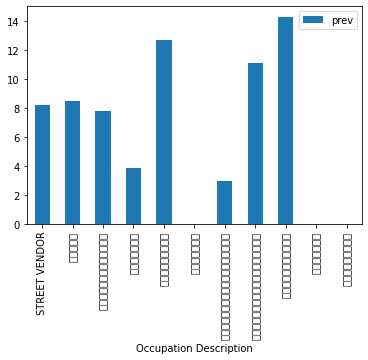

In [215]:
od_grp.plot.bar(x='Occupation Description', y='prev')

In [216]:
indexApp = df[(df['Vehicle Age']>=30)].index
df.drop(indexApp , inplace=True)
df

Application Number  Principal Approve Amount       %LTV  \
0      25651226INSI00001                   7500.00   3.325942   
10     25650621ULCR00004                  30000.00  24.793388   
22     25650621ULMB00060                  20000.00  57.971014   
59     25650623REUC00004                 165000.00  68.750000   
61     25650623ULMB00007                  28000.00  63.636364   
...                  ...                       ...        ...   
43069  25651128TRUM00004                  31632.28  73.563442   
43073  25651130TDUM00035                  22853.47  68.219313   
43583  25651130TDUC00041                 190000.00  75.247525   
47433  25651124TDUC00006                  97000.00  60.061920   
50786  25651118TDUC00007                 180000.00  64.285714   

       Principal Amount  %LTV_Current  Repayment Tenor Month Number Gender  \
0                  0.00      0.000000                            12      M   
10             26618.83     21.999033                            24      M   
22             18434.00     53.431884                            12      M   
59                 0.00      0.000000                            60      M   
61             26483.19     60.189068                            24      F   
...                 ...           ...                           ...    ...   
43069          31632.28     73.563442                            48      F   
43073          22853.47     68.219313                            36      F   
43583         186373.32     73.811216                            84      M   
47433          97000.00     60.061920                            36      F   
50786              0.00      0.000000                            36      M   

             DOB Occupation Description  Total Income Amount (Month)  ...  \
0     1992-12-05          พนักงานบริษัท                      10000.0  ...   
10    1994-12-24                  อื่นๆ                      40000.0  ...   
22    1994-01-26                  อื่นๆ                      15000.0  ...   
59    1990-10-19          STREET VENDOR                      30000.0  ...   
61    1989-12-30                  อื่นๆ                      15000.0  ...   
...          ...                    ...                          ...  ...   
43069 1973-06-24                  อื่นๆ                      10000.0  ...   
43073 1989-07-18          พนักงานบริษัท                      10000.0  ...   
43583 1985-01-15          พนักงานบริษัท                      60000.0  ...   
47433 1982-11-30          STREET VENDOR                      70000.0  ...   
50786 1966-01-15              ข้าราชการ                      48000.0  ...   

      Vehicle Sub Model Evaluation Amount System CAR Code (Daily)  \
0                    EP            225500                      S1   
10                   BT            121000                      S1   
22                   DB             34500                      S2   
59                   DZ            240000                      S1   
61                   CC             44000                      S2   
...                 ...               ...                     ...   
43069                DS             43000                      S2   
43073                AC             33500                      S2   
43583                AN            252500                      S2   
47433                BB            161500                      S2   
50786                GN            280000                      S1   

       System CAR Code Date Final CAR Code Previous Month  DPD  \
0                2022-12-26                            S1   PL   
10               2022-06-21                            S1   PL   
22               2023-01-10                            S3  NPL   
59               2023-01-10                            S2   PL   
61               2022-11-27                            S1  NPL   
...                     ...                           ...  ...   
43069            2022-11-28                            S2   PL   
43073 

In [217]:
df.describe()

Principal Approve Amount         %LTV  Principal Amount  %LTV_Current  \
count               2068.000000  2068.000000       2068.000000   2068.000000   
mean               91370.387253    69.228228      86373.808462     65.612874   
std               106936.245339    34.936363     104496.465645     34.883149   
min                 3000.000000     3.018868          0.000000      0.000000   
25%                23000.000000    64.702982      20000.000000     62.281166   
50%                30000.000000    72.673744      28988.375000     69.905347   
75%               150000.000000    75.000000     148139.070000     74.285714   
max              1000000.000000   984.375000    1000000.000000    984.375000   

       Repayment Tenor Month Number  Total Income Amount (Month)  \
count                   2068.000000                  2068.000000   
mean                      40.545455                 22798.163138   
std                       22.178114                 20248.418984   
min                       12.000000                     0.000000   
25%                       24.000000                 14500.000000   
50%                       36.000000                 19000.000000   
75%                       60.000000                 25000.000000   
max                      120.000000                500000.000000   

       Vehicle Release Year  Evaluation Amount          age  Vehicle Age  \
count           2068.000000       2.068000e+03  2068.000000  2068.000000   
mean            2012.687137       1.357162e+05    40.151838    10.312863   
std                5.070122       1.538281e+05    10.134660     5.070122   
min             1994.000000       1.000000e+04    21.000000     1.000000   
25%             2010.000000       3.500000e+04    32.000000     6.000000   
50%             2013.000000       4.400000e+04    39.000000    10.000000   
75%             2017.000000       2.266250e+05    47.000000    13.000000   
max             2022.000000       1.470000e+06    72.000000    29.000000   

            is_npl  
count  2068.000000  
mean      0.075919  
std       0.264932  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

In [218]:
indexApp = df[ (df['Principal Amount'] <= 0)].index
df.drop(indexApp , inplace=True)

In [219]:
df['Principal Amount'].min()

0.03

In [220]:
df['Principal Amount'].max()

1000000.0

In [221]:
df['Principal Approve Amount'].min()

3000.0

In [222]:
df['Principal Approve Amount'].max()

1000000.0

In [223]:
# indexApp = df[ (df['Total Income Amount (Month)'] >= 100000)].index
# df.drop(indexApp , inplace=True)

In [224]:
indexApp = df[ (df['Total Income Amount (Month)'] <= 6000)].index
df.drop(indexApp , inplace=True)

In [225]:
df.describe()

Principal Approve Amount         %LTV  Principal Amount  %LTV_Current  \
count               1986.000000  1986.000000       1986.000000   1986.000000   
mean               89510.655005    68.522181      88804.707316     67.240716   
std               105006.571827    26.310829     104765.822381     26.466569   
min                 3000.000000     3.018868       2110.760000      2.802289   
25%                23000.000000    64.705882      21975.267500     63.234069   
50%                30000.000000    72.554311      29200.710000     70.052539   
75%               150000.000000    75.000000     150000.000000     74.313228   
max              1000000.000000   630.434783    1000000.000000    625.968087   

       Repayment Tenor Month Number  Total Income Amount (Month)  \
count                   1986.000000                  1986.000000   
mean                      40.511581                 23006.448066   
std                       22.284696                 20422.364361   
min                       12.000000                  6500.000000   
25%                       24.000000                 15000.000000   
50%                       36.000000                 19020.000000   
75%                       60.000000                 25000.000000   
max                      120.000000                500000.000000   

       Vehicle Release Year  Evaluation Amount          age  Vehicle Age  \
count           1986.000000       1.986000e+03  1986.000000  1986.000000   
mean            2012.684290       1.333074e+05    40.115811    10.315710   
std                5.050827       1.511922e+05    10.163038     5.050827   
min             1994.000000       1.000000e+04    21.000000     1.000000   
25%             2010.000000       3.500000e+04    32.000000     6.000000   
50%             2013.000000       4.300000e+04    39.000000    10.000000   
75%             2017.000000       2.242500e+05    47.000000    13.000000   
max             2022.000000       1.470000e+06    72.000000    29.000000   

            is_npl  
count  1986.000000  
mean      0.075529  
std       0.264309  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

# Cleaning ข้อมูลจำนวนเดือนที่จะผ่อน

In [226]:
df['Repayment Tenor Month Number'].value_counts()

36     551
60     445
24     341
12     168
18     158
48      84
30      59
120     55
72      34
84      21
61      18
42      17
54      10
96      10
49       5
108      5
37       2
38       1
28       1
25       1
Name: Repayment Tenor Month Number, dtype: int64

In [227]:
indexApp = df[ (df['Repayment Tenor Month Number'] == 1)].index
df.drop(indexApp , inplace=True)
indexApp = df[ (df['Repayment Tenor Month Number'] == 3)].index
df.drop(indexApp , inplace=True)
indexApp = df[ (df['Repayment Tenor Month Number'] == 4)].index
df.drop(indexApp , inplace=True)
indexApp = df[ (df['Repayment Tenor Month Number'] == 14)].index
df.drop(indexApp , inplace=True)
indexApp = df[ (df['Repayment Tenor Month Number'] == 15)].index
df.drop(indexApp , inplace=True)
indexApp = df[ (df['Repayment Tenor Month Number'] == 20)].index
df.drop(indexApp , inplace=True)
indexApp = df[ (df['Repayment Tenor Month Number'] == 25)].index
df.drop(indexApp , inplace=True)
indexApp = df[ (df['Repayment Tenor Month Number'] == 28)].index
df.drop(indexApp , inplace=True)
indexApp = df[ (df['Repayment Tenor Month Number'] == 32)].index
df.drop(indexApp , inplace=True)
indexApp = df[ (df['Repayment Tenor Month Number'] == 37)].index
df.drop(indexApp , inplace=True)
indexApp = df[ (df['Repayment Tenor Month Number'] == 38)].index
df.drop(indexApp , inplace=True)
indexApp = df[ (df['Repayment Tenor Month Number'] == 40)].index
df.drop(indexApp , inplace=True)
indexApp = df[ (df['Repayment Tenor Month Number'] == 49)].index
df.drop(indexApp , inplace=True)
indexApp = df[ (df['Repayment Tenor Month Number'] == 50)].index
df.drop(indexApp , inplace=True)
indexApp = df[ (df['Repayment Tenor Month Number'] == 54)].index
df.drop(indexApp , inplace=True)
indexApp = df[ (df['Repayment Tenor Month Number'] == 56)].index
df.drop(indexApp , inplace=True)
indexApp = df[ (df['Repayment Tenor Month Number'] == 61)].index
df.drop(indexApp , inplace=True)
indexApp = df[ (df['Repayment Tenor Month Number'] == 96)].index
df.drop(indexApp , inplace=True)
indexApp = df[ (df['Repayment Tenor Month Number'] == 108)].index
df.drop(indexApp , inplace=True)
indexApp = df[ (df['Repayment Tenor Month Number'] == 120)].index
df.drop(indexApp , inplace=True)
df.head(15)

Application Number  Principal Approve Amount       %LTV  Principal Amount  \
10   25650621ULCR00004                   30000.0  24.793388          26618.83   
22   25650621ULMB00060                   20000.0  57.971014          18434.00   
61   25650623ULMB00007                   28000.0  63.636364          26483.19   
64   25650623REUM00003                   51000.0  79.069767          50715.88   
69   25650623ULMB00021                   14000.0  73.684211          13975.46   
72   25650623ULMB00025                   30000.0  64.516129          29959.48   
94   25650624ULCR00024                   90000.0  57.324841          89933.60   
111  25650625REUC00004                  130000.0  61.320755         130000.00   
131  25650627ULMB00018                   37000.0  64.798599          36011.72   
145  25650627ULCR00018                  170000.0  71.881607         166153.35   
148  25650627ULMB00032                   17000.0  69.387755          16920.59   
161  25650627ULCR00027                  300000.0  63.091483         298055.87   
168  25650627ULMB00053                   17000.0  72.340426          16790.22   
174  25650627ULCR00036                  360000.0  74.688797         359919.86   
179  25650627ULMB00062                   25000.0  74.626866          24347.90   

     %LTV_Current  Repayment Tenor Month Number Gender        DOB  \
10      21.999033                            24      M 1994-12-24   
22      53.431884                            12      M 1994-01-26   
61      60.189068                            24      F 1989-12-30   
64      78.629271                            36      F 1995-04-10   
69      73.555053                            36      F 1982-10-22   
72      64.428989                            24      F 1979-05-30   
94      57.282548                            24      M 1966-09-20   
111     61.320755                            60      F 1986-12-09   
131     63.067811                            36      M 1997-02-03   
145     70.255116                            24      M 1962-01-30   
148     69.063633                            36      M 1988-01-02   
161     62.682623                            60      M 1984-09-10   
168     71.447745                            18      M 1985-03-07   
174     74.672170                            60      M 1993-03-09   
179     72.680299                            36      F 1991-07-31   

    Occupation Description  Total Income Amount (Month)  ...  \
10                   อื่นๆ                      40000.0  ...   
22                   อื่นๆ                      15000.0  ...   
61                   อื่นๆ                      15000.0  ...   
64                   อื่นๆ                      10000.0  ...   
69           พนักงานบริษัท                      13000.0  ...   
72                   อื่นๆ                      20000.0  ...   
94           พนักงานบริษัท                      15000.0  ...   
111          STREET VENDOR                      35000.0  ...   
131          พนักงานบริษัท                      20500.0  ...   
145                  อื่นๆ                      50000.0  ...   
148                  อื่นๆ                      20000.0  ...   
161                  อื่นๆ                      14000.0  ...   
168          พนักงานบริษัท                      20000.0  ...   
174                  อื่นๆ                      50000.0  ...   
179                  อื่นๆ                      15000.0  ...   

    Vehicle Sub Model Evaluation Amount System CAR Code (Daily)  \
10                 BT            121000                      S1   
22                 DB             34500                      S2   
61                 CC             44000                      S2   
64                 BV             64500                      S3   
69                 AF             19000                      S2   
72                 AY             46500                      S2   
94                 AO            157000                      S2   
111                BU            212000  

In [228]:
df['Repayment Tenor Month Number'].value_counts()

36    551
60    445
24    341
12    168
18    158
48     84
30     59
72     34
84     21
42     17
Name: Repayment Tenor Month Number, dtype: int64

# ข้อมูลที่เหลือหลังจากถูกการ Cleaning

In [229]:
df.shape

(1878, 24)

In [230]:
df[(df['DPD']=='PL')]

Application Number  Principal Approve Amount       %LTV  \
10     25650621ULCR00004                  30000.00  24.793388   
69     25650623ULMB00021                  14000.00  73.684211   
72     25650623ULMB00025                  30000.00  64.516129   
94     25650624ULCR00024                  90000.00  57.324841   
111    25650625REUC00004                 130000.00  61.320755   
...                  ...                       ...        ...   
42439  25651205TRUC00002                 189000.00  74.556213   
43069  25651128TRUM00004                  31632.28  73.563442   
43073  25651130TDUM00035                  22853.47  68.219313   
43583  25651130TDUC00041                 190000.00  75.247525   
47433  25651124TDUC00006                  97000.00  60.061920   

       Principal Amount  %LTV_Current  Repayment Tenor Month Number Gender  \
10             26618.83     21.999033                            24      M   
69             13975.46     73.555053                            36      F   
72             29959.48     64.428989                            24      F   
94             89933.60     57.282548                            24      M   
111           130000.00     61.320755                            60      F   
...                 ...           ...                           ...    ...   
42439         189000.00     74.556213                            72      F   
43069          31632.28     73.563442                            48      F   
43073          22853.47     68.219313                            36      F   
43583         186373.32     73.811216                            84      M   
47433          97000.00     60.061920                            36      F   

             DOB Occupation Description  Total Income Amount (Month)  ...  \
10    1994-12-24                  อื่นๆ                      40000.0  ...   
69    1982-10-22          พนักงานบริษัท                      13000.0  ...   
72    1979-05-30                  อื่นๆ                      20000.0  ...   
94    1966-09-20          พนักงานบริษัท                      15000.0  ...   
111   1986-12-09          STREET VENDOR                      35000.0  ...   
...          ...                    ...                          ...  ...   
42439 1977-09-05          พนักงานบริษัท                      20620.0  ...   
43069 1973-06-24                  อื่นๆ                      10000.0  ...   
43073 1989-07-18          พนักงานบริษัท                      10000.0  ...   
43583 1985-01-15          พนักงานบริษัท                      60000.0  ...   
47433 1982-11-30          STREET VENDOR                      70000.0  ...   

      Vehicle Sub Model Evaluation Amount System CAR Code (Daily)  \
10                   BT            121000                      S1   
69                   AF             19000                      S2   
72                   AY             46500                      S2   
94                   AO            157000                      S2   
111                  BU            212000                      S2   
...                 ...               ...                     ...   
42439                DV            253500                      S2   
43069                DS             43000                      S2   
43073                AC             33500                      S2   
43583                AN            252500                      S2   
47433                BB            161500                      S2   

       System CAR Code Date Final CAR Code Previous Month  DPD  \
10               2022-06-21                            S1   PL   
69               2022-12-07                            S1   PL   
72               2023-01-14                            S1   PL   
94               2023-01-09                            S1   PL   
111              2022-12-07                            S1   PL   
...                     ...                           ...  ...   
42439            2022-12-06                            S2   PL   
43069 

In [231]:
df[(df['DPD']=='NPL')]

Application Number  Principal Approve Amount       %LTV  \
22     25650621ULMB00060                   20000.0  57.971014   
61     25650623ULMB00007                   28000.0  63.636364   
64     25650623REUM00003                   51000.0  79.069767   
131    25650627ULMB00018                   37000.0  64.798599   
426    25650629ULMB00287                   35000.0  75.268817   
...                  ...                       ...        ...   
9753   25650822ULCR00153                  300000.0  61.919505   
10110  25650824ULMB00054                   33000.0  78.571429   
10347  25650824REUM00039                   31500.0  75.000000   
10406  25650825ULMB00051                   30000.0  85.714286   
11951  25650831ULCR00077                   68400.0  30.000000   

       Principal Amount  %LTV_Current  Repayment Tenor Month Number Gender  \
22             18434.00     53.431884                            12      M   
61             26483.19     60.189068                            24      F   
64             50715.88     78.629271                            36      F   
131            36011.72     63.067811                            36      M   
426            35000.00     75.268817                            36      F   
...                 ...           ...                           ...    ...   
9753          300000.00     61.919505                            60      F   
10110          33000.00     78.571429                            36      M   
10347          31500.00     75.000000                            36      F   
10406          29711.00     84.888571                            24      M   
11951          67484.99     29.598680                            24      M   

             DOB Occupation Description  Total Income Amount (Month)  ...  \
22    1994-01-26                  อื่นๆ                      15000.0  ...   
61    1989-12-30                  อื่นๆ                      15000.0  ...   
64    1995-04-10                  อื่นๆ                      10000.0  ...   
131   1997-02-03          พนักงานบริษัท                      20500.0  ...   
426   1981-06-13          STREET VENDOR                      15000.0  ...   
...          ...                    ...                          ...  ...   
9753  1971-11-04                เกษตรกร                      20000.0  ...   
10110 1979-09-16          พนักงานบริษัท                      18000.0  ...   
10347 1986-01-01          พนักงานบริษัท                      17000.0  ...   
10406 1985-12-22          STREET VENDOR                      15000.0  ...   
11951 1979-01-26              ข้าราชการ                      32680.0  ...   

      Vehicle Sub Model Evaluation Amount System CAR Code (Daily)  \
22                   DB             34500                      S2   
61                   CC             44000                      S2   
64                   BV             64500                      S3   
131                  CP             57100                      S3   
426                  CX             46500                      S3   
...                 ...               ...                     ...   
9753                 DQ            484500                      S3   
10110                CA             42000                      S2   
10347                DG             42000                      S2   
10406                BW             35000                      S3   
11951                BF            228000                      S1   

       System CAR Code Date Final CAR Code Previous Month  DPD  \
22               2023-01-10                            S3  NPL   
61               2022-11-27                            S1  NPL   
64               2022-12-29                            S2  NPL   
131              2022-12-29                            S2  NPL   
426              2022-12-06                            S2  NPL   
...                     ...                           ...  ...   
9753             2022-12-29                            S2  NPL   
10110 

# ทำการแบ่งข้อมูล จาก 6479 rows แบ่งมา 4% ของข้อมูลทั้งหมดของ PL ก่อนเข้าสู่ Machine Learning

In [232]:
'''df_pl = df[df['DPD']=='PL'].sample(frac=0.04, replace=True, random_state=1)
df_pl.shape'''

"df_pl = df[df['DPD']=='PL'].sample(frac=0.04, replace=True, random_state=1)\ndf_pl.shape"

In [233]:
'''df_npl = df.loc[df['DPD']!='PL']
df_npl.shape'''

"df_npl = df.loc[df['DPD']!='PL']\ndf_npl.shape"

PL 257 rows

NPL 42 rows

total 299 rows

คิด % NPL ได้เท่ากับ 14.046%

In [234]:
'''join_df = [df_pl,df_npl]
new_df = pd.concat(join_df, ignore_index=True)'''

'join_df = [df_pl,df_npl]\nnew_df = pd.concat(join_df, ignore_index=True)'

In [235]:
#new_df['DPD'].describe()

In [236]:
#new_df['DPD'].value_counts()

In [237]:
#new_df.describe()

In [238]:
#new_df['Total Income Amount (Month)'].value_counts()

In [239]:
#new_df['Repayment Tenor Month Number'].value_counts()

In [240]:
#new_df['Vehicle Age'].value_counts(ascending=False)

In [241]:
#new_df['Application Status'].value_counts()

In [242]:
#new_df[(new_df['Application Status']=='APPLICATION_COMPLETED')]

# ดูข้อมูล

In [243]:
category = ['Collateral Type Code','Vehicle Release Year','Vehicle Age','age','Repayment Tenor Month Number','Occupation Description','System CAR Code (Daily)','DPD','Application Status']

for i in category:
    print(f'{i}:{df[i].unique()}\n')

Collateral Type Code:['CAR' 'MC' 'PU' 'VAN' 'TRUCK']

Vehicle Release Year:[2012 2019 2015 2018 2009 2007 2022 2011 2014 2013 2010 2008 2016 2000
 2020 2005 2017 2003 2021 2006 2002 1999 2004 1996 1997 2001 1994 1995]

Vehicle Age:[11  4  8  5 14 16  1 12  9 10 13 15  7 23  3 18  6 20  2 17 21 24 19 27
 26 22 29 28]

age:[29 34 28 41 44 57 37 26 61 35 39 38 30 32 50 67 47 55 49 62 40 31 42 43
 33 45 23 36 56 69 48 53 22 51 27 58 24 25 66 46 65 63 59 54 60 52 68 71
 72 64 21 70]

Repayment Tenor Month Number:[24 12 36 60 18 48 30 42 72 84]

Occupation Description:['อื่นๆ' 'พนักงานบริษัท' 'STREET VENDOR' 'พนักงานรัฐวิสาหกิจ' 'เกษตรกร'
 'ข้าราชการ' 'อาจารย์' 'เลี้ยงสัตว์' 'บุคลากรทางการแพทย์' 'นักกฎหมาย'
 'สถาปนิก']

System CAR Code (Daily):['S1' 'S2' 'S3']

DPD:['PL', 'NPL']
Categories (2, object): ['PL' < 'NPL']

Application Status:['APPLICATION_COMPLETED']



In [244]:
for i in category:
    print(f'{i}:{df[i].value_counts()}\n')

Collateral Type Code:MC       1199
PU        348
CAR       313
VAN        12
TRUCK       6
Name: Collateral Type Code, dtype: int64

Vehicle Release Year:2012    191
2013    156
2017    152
2016    142
2018    141
2019    140
2010    125
2011    113
2014    101
2015     85
2008     75
2007     65
2005     63
2020     59
2009     57
2006     47
2003     34
2004     34
2021     23
2022     20
2002     16
2001     10
2000     10
1996      6
1999      5
1997      4
1994      3
1995      1
Name: Vehicle Release Year, dtype: int64

Vehicle Age:11    191
10    156
6     152
7     142
5     141
4     140
13    125
12    113
9     101
8      85
15     75
16     65
18     63
3      59
14     57
17     47
20     34
19     34
2      23
1      20
21     16
22     10
23     10
27      6
24      5
26      4
29      3
28      1
Name: Vehicle Age, dtype: int64

age:40    88
39    83
38    80
30    77
35    70
36    70
33    68
41    67
31    64
32    62
37    62
45    58
34    58
43    56
29    54
47  

# Drop Data Complete and Reject

In [245]:
# indexApp = df[ (df['Application Status'] != 'APPLICATION_COMPLETED') & (df['Application Status'] != 'APPLICATION_REJECTED') ].index
# df.drop(indexApp , inplace=True)
# df.shape

In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1878 entries, 10 to 47433
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Application Number             1878 non-null   object        
 1   Principal Approve Amount       1878 non-null   float64       
 2   %LTV                           1878 non-null   float64       
 3   Principal Amount               1878 non-null   float64       
 4   %LTV_Current                   1878 non-null   float64       
 5   Repayment Tenor Month Number   1878 non-null   int32         
 6   Gender                         1878 non-null   object        
 7   DOB                            1878 non-null   datetime64[ns]
 8   Occupation Description         1878 non-null   object        
 9   Total Income Amount (Month)    1878 non-null   float64       
 10  Collateral Type Code           1878 non-null   object        
 11  Vehicle Brand  

# Q1-Q3 Boxplot

In [247]:
cal_Q1 = df["Principal Approve Amount"].quantile(0.25)
cal_Q3 = df["Principal Approve Amount"].quantile(0.75)
cal_IQR = cal_Q3 - cal_Q1
cal_IQR

112500.0

In [248]:
lower_limit = cal_Q1 - (1.5 * cal_IQR)
upper_limit = cal_Q3 + (1.5 * cal_IQR)
print('lower:', lower_limit, 'upper:', upper_limit)

lower: -147250.0 upper: 302750.0


In [249]:
df.shape

(1878, 24)

<AxesSubplot:>

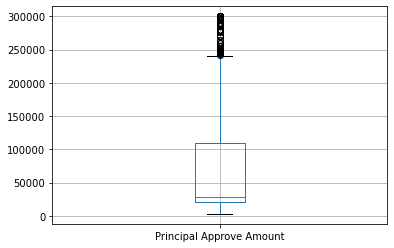

In [250]:
df = df[(df['Principal Approve Amount'] > lower_limit) & (df['Principal Approve Amount'] < upper_limit)]
df.boxplot(column=['Principal Approve Amount'])

<AxesSubplot:>

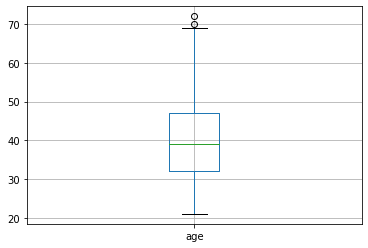

In [251]:
df = df[(df['age'] > lower_limit) & (df['age'] < upper_limit)]
df.boxplot(column=['age'])

<AxesSubplot:>

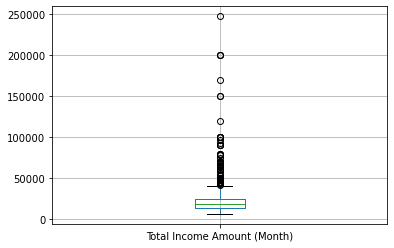

In [252]:
df = df[(df['Total Income Amount (Month)'] > lower_limit) & (df['Total Income Amount (Month)'] < upper_limit)]
df.boxplot(column=['Total Income Amount (Month)'])

In [253]:
cal_Q1 = df["Total Income Amount (Month)"].quantile(0.25)
cal_Q3 = df["Total Income Amount (Month)"].quantile(0.75)
cal_IQR = cal_Q3 - cal_Q1
cal_IQR

11000.0

In [254]:
lower_limit = cal_Q1 - 1.5 * cal_IQR
upper_limit = cal_Q3 + 1.5 * cal_IQR
print('lower:', lower_limit, 'upper:', upper_limit)

lower: -2500.0 upper: 41500.0


<AxesSubplot:>

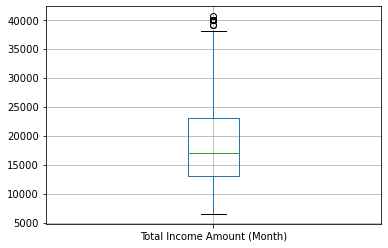

In [255]:
df = df[(df['Total Income Amount (Month)'] > lower_limit) & (df['Total Income Amount (Month)'] < upper_limit)]
df.boxplot(column=['Total Income Amount (Month)'])

<AxesSubplot:>

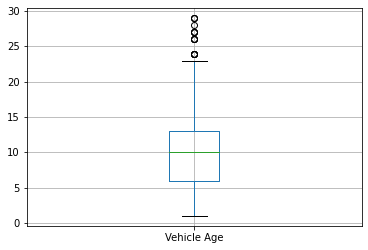

In [256]:
df = df[(df['Vehicle Age'] > lower_limit) & (df['Vehicle Age'] < upper_limit)]
df.boxplot(column=['Vehicle Age'])

In [257]:
cal_Q1 = df["Vehicle Age"].quantile(0.25)
cal_Q3 = df["Vehicle Age"].quantile(0.75)
cal_IQR = cal_Q3 - cal_Q1
cal_IQR

7.0

In [258]:
lower_limit = cal_Q1 - 1.5 * cal_IQR
upper_limit = cal_Q3 + 1.5 * cal_IQR
print('lower:', lower_limit, 'upper:', upper_limit)

lower: -4.5 upper: 23.5


<AxesSubplot:>

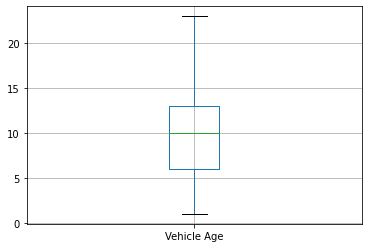

In [259]:
df = df[(df['Vehicle Age'] > lower_limit) & (df['Vehicle Age'] < upper_limit)]
df.boxplot(column=['Vehicle Age'])

In [260]:
df['Gender'].value_counts()

F    948
M    736
Name: Gender, dtype: int64

In [261]:
# check prev

In [262]:
df.describe()

Principal Approve Amount         %LTV  Principal Amount  %LTV_Current  \
count               1684.000000  1684.000000       1684.000000   1684.000000   
mean               66791.506372    68.101648      66167.732239     66.704221   
std                75583.971722    23.055097      75589.266566     23.291583   
min                 3000.000000     3.018868       2110.760000      2.802289   
25%                20000.000000    64.705882      19897.280000     63.006859   
50%                28550.000000    72.497599      27903.440000     70.021320   
75%               100000.000000    74.932815      99061.467500     74.147860   
max               300000.000000   600.000000     300000.000000    600.000000   

       Repayment Tenor Month Number  Total Income Amount (Month)  \
count                   1684.000000                  1684.000000   
mean                      36.178147                 18878.967850   
std                       16.686166                  7685.345467   
min                       12.000000                  6500.000000   
25%                       24.000000                 13000.000000   
50%                       36.000000                 17000.000000   
75%                       48.000000                 23000.000000   
max                       84.000000                 40590.000000   

       Vehicle Release Year  Evaluation Amount          age  Vehicle Age  \
count           1684.000000        1684.000000  1684.000000  1684.000000   
mean            2012.951306      101491.983373    39.726841    10.048694   
std                4.857078      112265.933598    10.184231     4.857078   
min             2000.000000       10000.000000    21.000000     1.000000   
25%             2010.000000       32000.000000    32.000000     6.000000   
50%             2013.000000       41000.000000    39.000000    10.000000   
75%             2017.000000      167750.000000    46.000000    13.000000   
max             2022.000000      831000.000000    72.000000    23.000000   

            is_npl  
count  1684.000000  
mean      0.084323  
std       0.277954  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

# Data Visualize

## Exploratory Data Analysis

### categorical

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

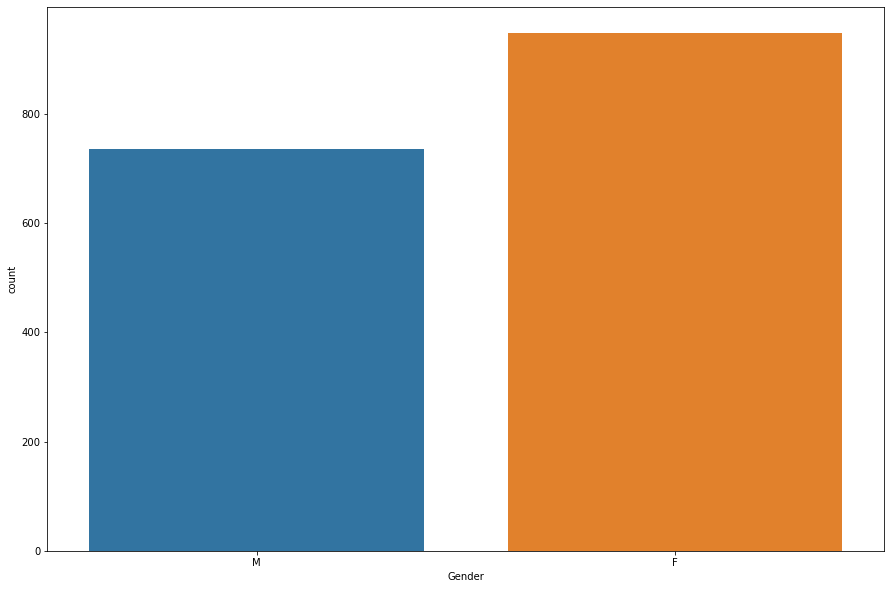

In [263]:
plt.figure(figsize=(15,10))
sns.countplot(df['Gender'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Occupation Description', ylabel='count'>

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 3629 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 3639 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 3656 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 3609 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 3654 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 3614 missing from current

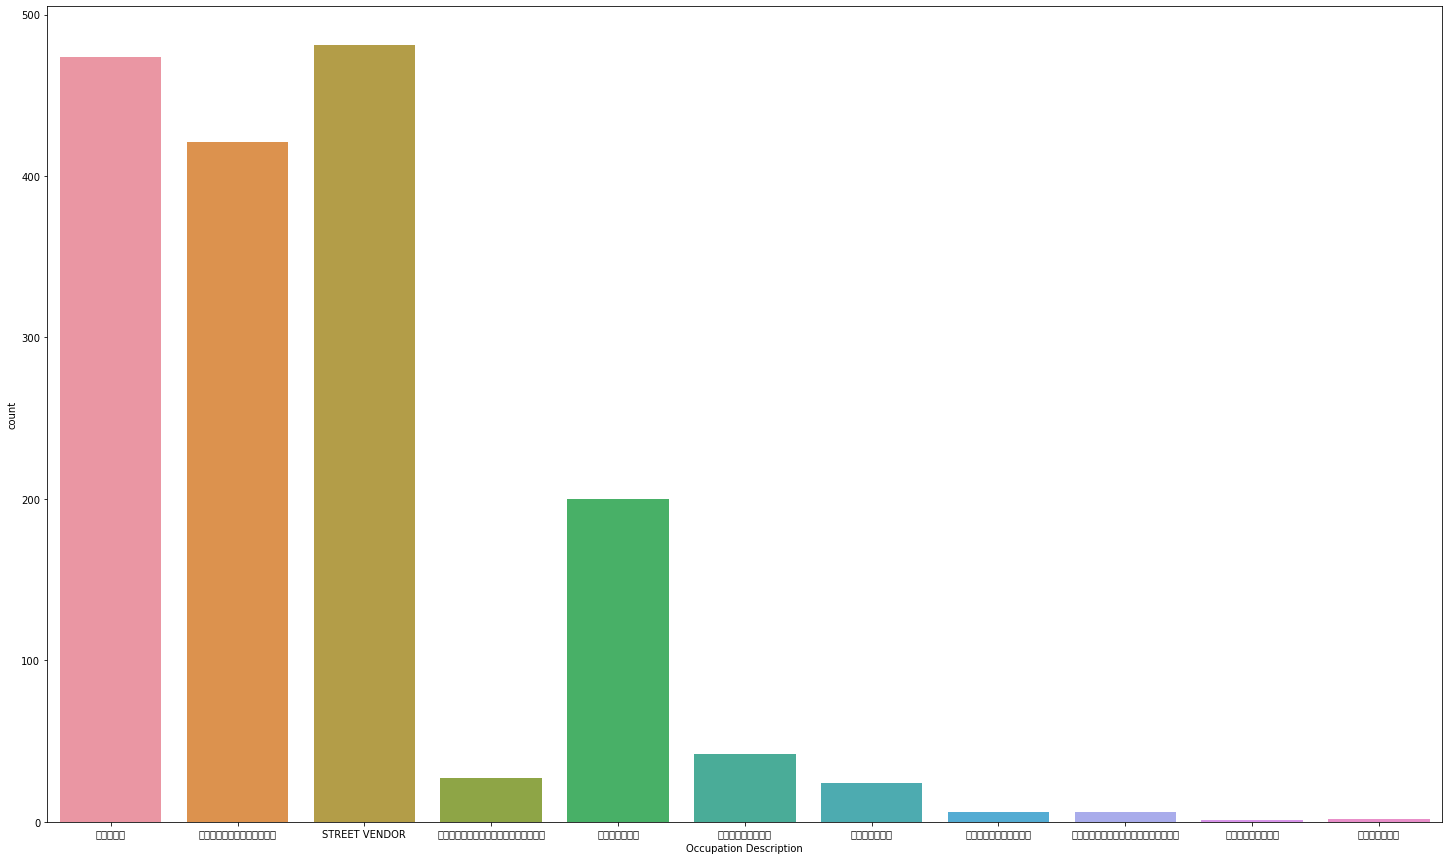

In [264]:
plt.figure(figsize=(25,15))
sns.countplot(df['Occupation Description'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Vehicle Age', ylabel='count'>

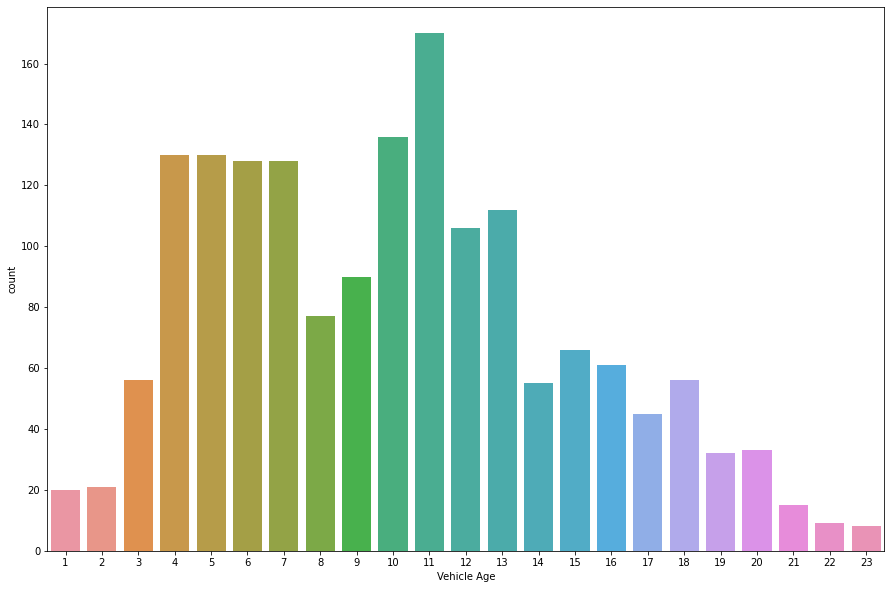

In [265]:
plt.figure(figsize=(15,10))
sns.countplot(df['Vehicle Age'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Collateral Type Code', ylabel='count'>

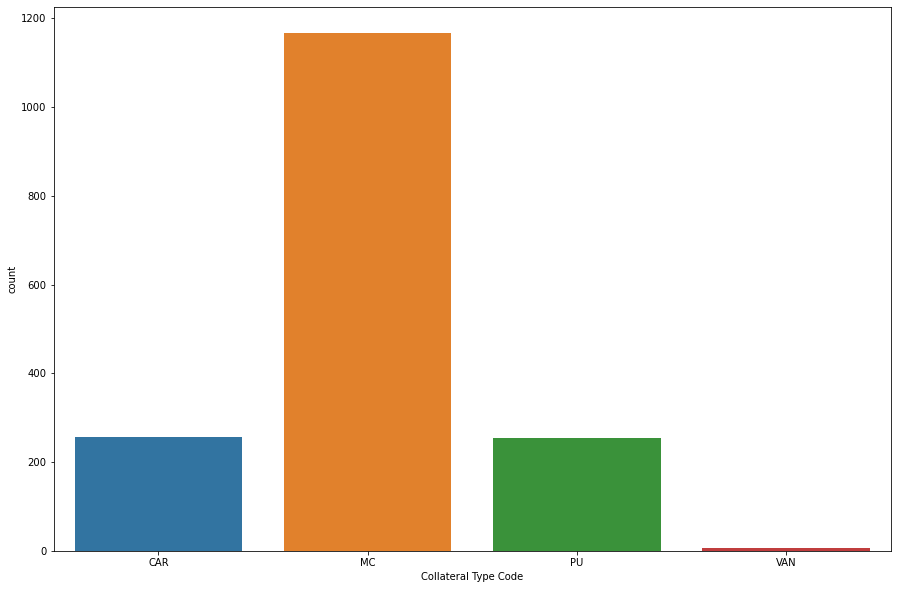

In [266]:
plt.figure(figsize=(15,10))
sns.countplot(df['Collateral Type Code'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Vehicle Brand', ylabel='count'>

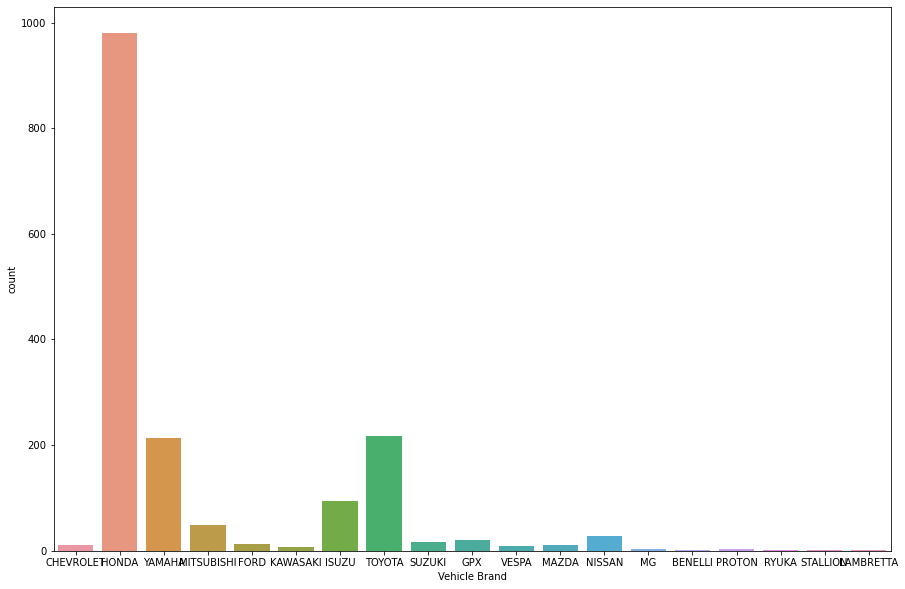

In [267]:
plt.figure(figsize=(15,10))
sns.countplot(df['Vehicle Brand'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='System CAR Code (Daily)', ylabel='count'>

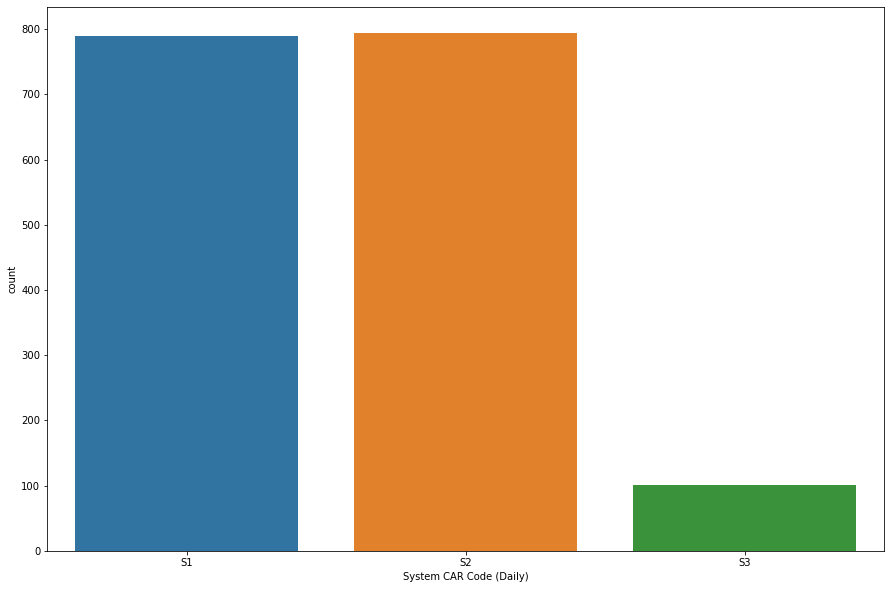

In [268]:
plt.figure(figsize=(15,10))
sns.countplot(df['System CAR Code (Daily)'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='count'>

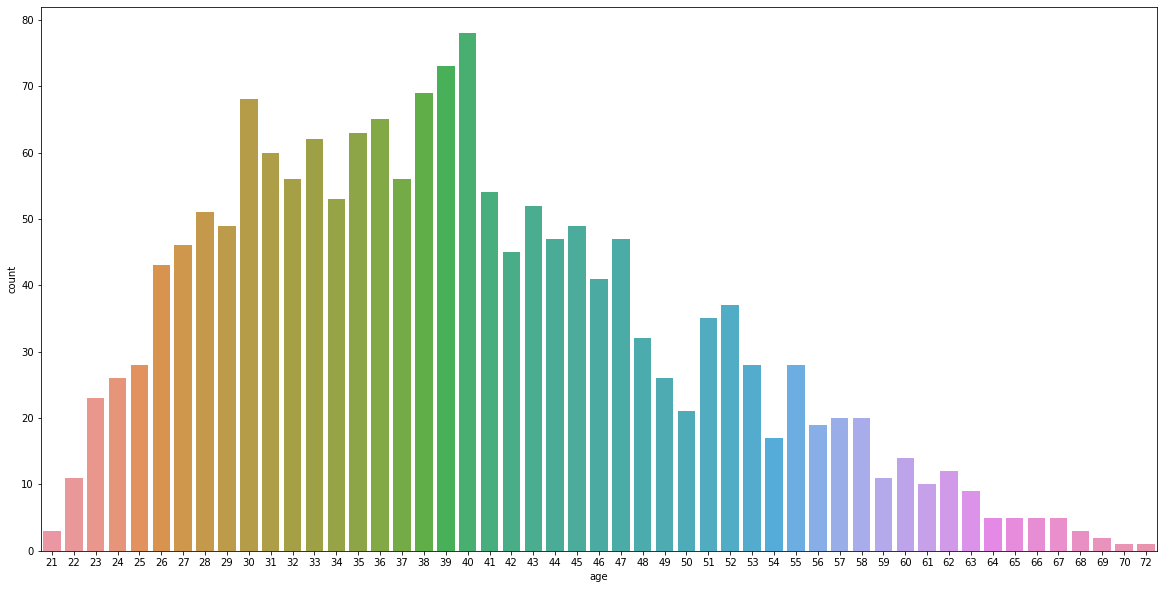

In [269]:
plt.figure(figsize=(20,10))
sns.countplot(df['age'])

In [270]:
# plt.figure(figsize=(10,10))
# sns.countplot(df['Application Status'])

### numerical

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

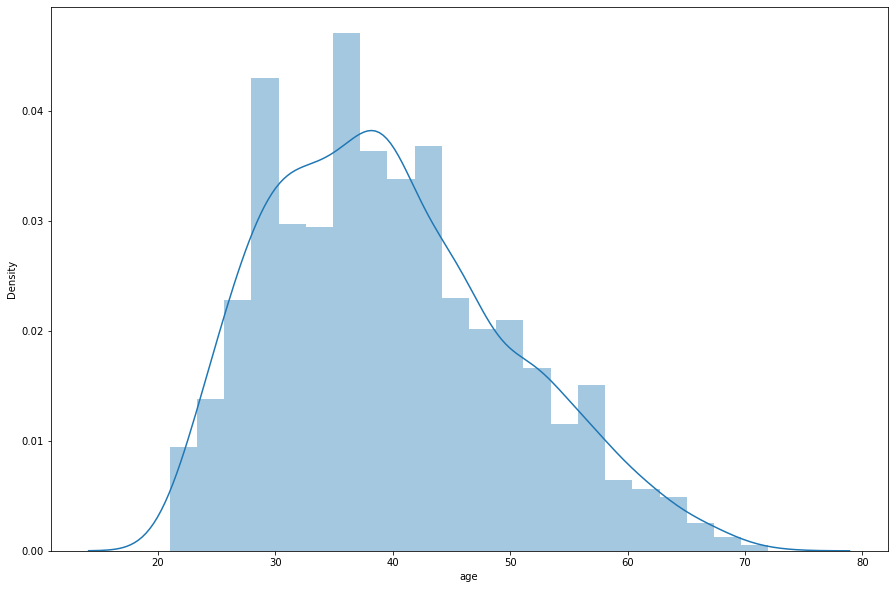

In [271]:
plt.figure(figsize=(15,10))
sns.distplot(df['age'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Principal Approve Amount', ylabel='Density'>

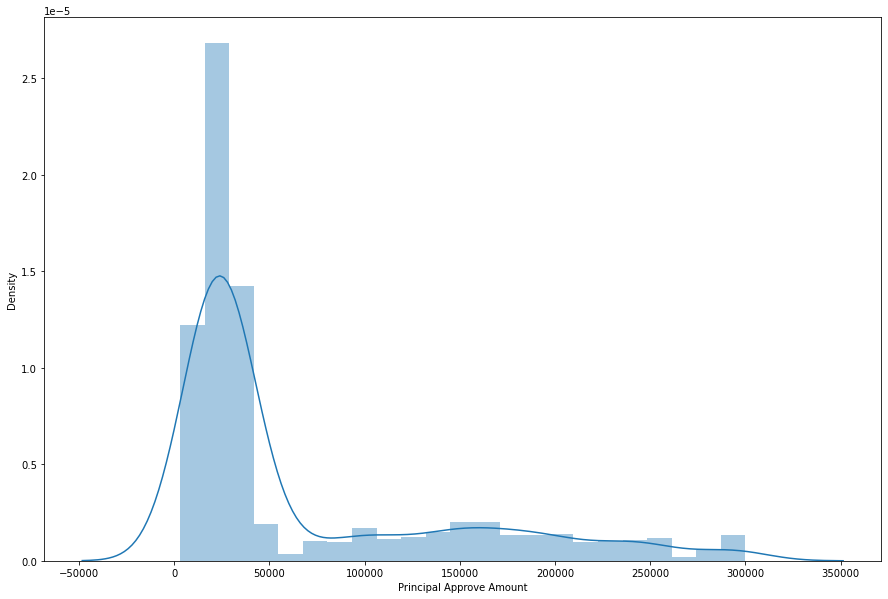

In [312]:
plt.figure(figsize=(15,10))
sns.distplot(df['Principal Approve Amount'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Repayment Tenor Month Number', ylabel='Density'>

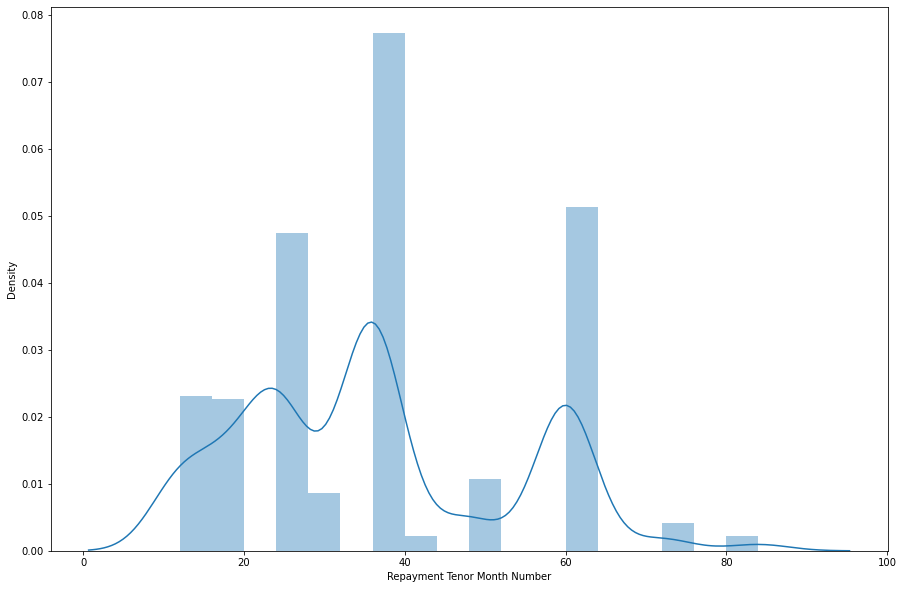

In [273]:
plt.figure(figsize=(15,10))
sns.distplot(df['Repayment Tenor Month Number'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total Income Amount (Month)', ylabel='Density'>

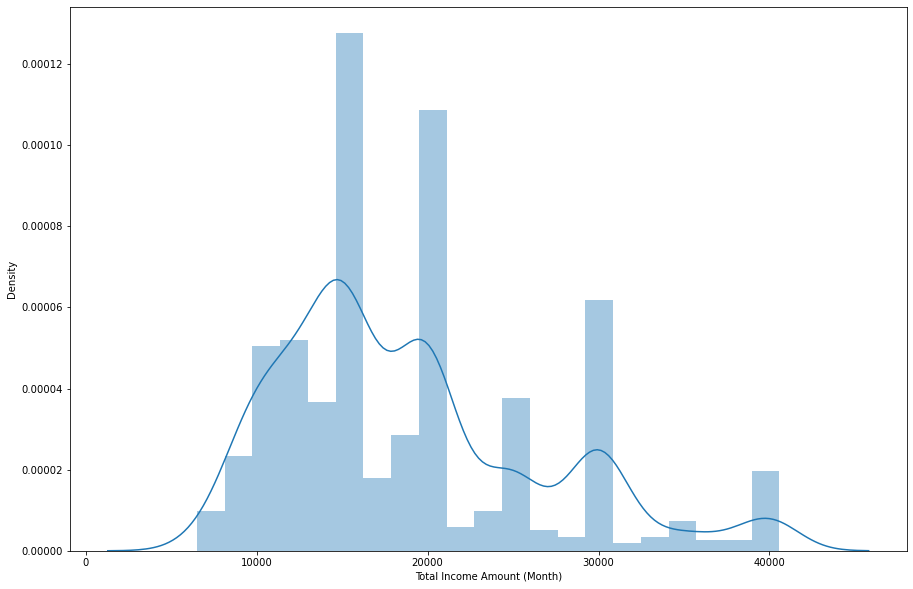

In [274]:
plt.figure(figsize=(15,10))
sns.distplot(df['Total Income Amount (Month)'])

## Coorelation Matrix

In [275]:
df

Application Number  Principal Approve Amount       %LTV  \
10     25650621ULCR00004                  30000.00  24.793388   
22     25650621ULMB00060                  20000.00  57.971014   
61     25650623ULMB00007                  28000.00  63.636364   
64     25650623REUM00003                  51000.00  79.069767   
69     25650623ULMB00021                  14000.00  73.684211   
...                  ...                       ...        ...   
41160  25651130TRUC00042                 150000.00  68.337130   
42273  25651126TDUC00001                 210000.00  74.336283   
42439  25651205TRUC00002                 189000.00  74.556213   
43069  25651128TRUM00004                  31632.28  73.563442   
43073  25651130TDUM00035                  22853.47  68.219313   

       Principal Amount  %LTV_Current  Repayment Tenor Month Number Gender  \
10             26618.83     21.999033                            24      M   
22             18434.00     53.431884                            12      M   
61             26483.19     60.189068                            24      F   
64             50715.88     78.629271                            36      F   
69             13975.46     73.555053                            36      F   
...                 ...           ...                           ...    ...   
41160         150000.00     68.337130                            84      F   
42273         210000.00     74.336283                            60      M   
42439         189000.00     74.556213                            72      F   
43069          31632.28     73.563442                            48      F   
43073          22853.47     68.219313                            36      F   

             DOB Occupation Description  Total Income Amount (Month)  ...  \
10    1994-12-24                  อื่นๆ                      40000.0  ...   
22    1994-01-26                  อื่นๆ                      15000.0  ...   
61    1989-12-30                  อื่นๆ                      15000.0  ...   
64    1995-04-10                  อื่นๆ                      10000.0  ...   
69    1982-10-22          พนักงานบริษัท                      13000.0  ...   
...          ...                    ...                          ...  ...   
41160 1970-01-12                เกษตรกร                      15000.0  ...   
42273 1968-09-26          STREET VENDOR                      20000.0  ...   
42439 1977-09-05          พนักงานบริษัท                      20620.0  ...   
43069 1973-06-24                  อื่นๆ                      10000.0  ...   
43073 1989-07-18          พนักงานบริษัท                      10000.0  ...   

      Vehicle Sub Model Evaluation Amount System CAR Code (Daily)  \
10                   BT            121000                      S1   
22                   DB             34500                      S2   
61                   CC             44000                      S2   
64                   BV             64500                      S3   
69                   AF             19000                      S2   
...                 ...               ...                     ...   
41160                CF            219500                      S2   
42273                AB            282500                      S2   
42439                DV            253500                      S2   
43069                DS             43000                      S2   
43073                AC             33500                      S2   

       System CAR Code Date Final CAR Code Previous Month  DPD  \
10               2022-06-21                            S1   PL   
22               2023-01-10                            S3  NPL   
61               2022-11-27                            S1  NPL   
64               2022-12-29                            S2  NPL   
69               2022-12-07                            S1   PL   
...                     ...                           ...  ...   
41160            2022-11-30                            S2   PL   
42273 

In [276]:
corr = df.corr()
corr

Principal Approve Amount      %LTV  \
Principal Approve Amount                      1.000000  0.124626   
%LTV                                          0.124626  1.000000   
Principal Amount                              0.999875  0.126156   
%LTV_Current                                  0.153789  0.994664   
Repayment Tenor Month Number                  0.750041  0.168787   
Total Income Amount (Month)                   0.319799 -0.005203   
Vehicle Release Year                         -0.307895  0.077802   
Evaluation Amount                             0.928561 -0.089927   
age                                           0.089490 -0.045110   
Vehicle Age                                   0.307895 -0.077802   
is_npl                                        0.015294  0.009877   

                              Principal Amount  %LTV_Current  \
Principal Approve Amount              0.999875      0.153789   
%LTV                                  0.126156      0.994664   
Principal Amount                      1.000000      0.156340   
%LTV_Current                          0.156340      1.000000   
Repayment Tenor Month Number          0.752554      0.210357   
Total Income Amount (Month)           0.319495      0.005420   
Vehicle Release Year                 -0.308416      0.067311   
Evaluation Amount                     0.927727     -0.058612   
age                                   0.087806     -0.055820   
Vehicle Age                           0.308416     -0.067311   
is_npl                                0.016449      0.023008   

                              Repayment Tenor Month Number  \
Principal Approve Amount                          0.750041   
%LTV                                              0.168787   
Principal Amount                                  0.752554   
%LTV_Current                                      0.210357   
Repayment Tenor Month Number                      1.000000   
Total Income Amount (Month)                       0.215196   
Vehicle Release Year                             -0.318807   
Evaluation Amount                                 0.696483   
age                                               0.045034   
Vehicle Age                                       0.318807   
is_npl                                           -0.006315   

                              Total Income Amount (Month)  \
Principal Approve Amount                         0.319799   
%LTV                                            -0.005203   
Principal Amount                                 0.319495   
%LTV_Current                                     0.005420   
Repayment Tenor Month Number                     0.215196   
Total Income Amount (Month)                      1.000000   
Vehicle Release Year                            -0.113924   
Evaluation Amount                                0.337024   
age                                              0.105084   
Vehicle Age                                      0.113924   
is_npl                                           0.059799   

                              Vehicle Release Year  Evaluation Amount  \
Principal Approve Amount                 -0.307895           0.928561   
%LTV                                      0.077802          -0.089927   
Principal Amount                         -0.308416           0.927727   
%LTV_Current                              0.067311          -0.058612   
Repayment Tenor Month Number             -0.318807           0.696483   
Total Income Amount (Month)              -0.113924           0.337024   
Vehicle Release Year                      1.000000          -0.310071   
Evaluation Amount                        -0.310071           1.000000   
age                                      -0.151295           0.110508   
Vehicle Age                              -1.000000           0.310071   
is_npl                                    0.026809           0.020034   

                                   age  Vehicle Age    is_npl  
Principal Approve Amount 

<AxesSubplot:>

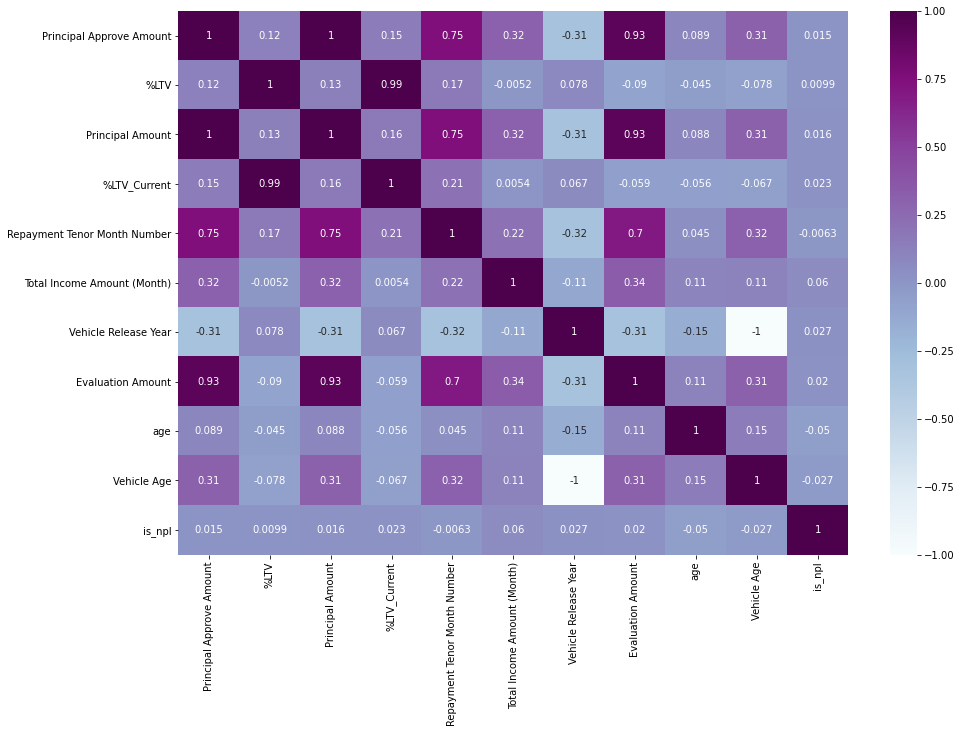

In [277]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True, cmap="BuPu")

In [278]:
for i in category:
    print(f'{i}:{df[i].unique()}\n')

Collateral Type Code:['CAR' 'MC' 'PU' 'VAN']

Vehicle Release Year:[2012 2019 2015 2018 2009 2007 2022 2014 2013 2011 2010 2008 2016 2020
 2000 2005 2017 2003 2021 2006 2002 2004 2001]

Vehicle Age:[11  4  8  5 14 16  1  9 10 12 13 15  7  3 23 18  6 20  2 17 21 19 22]

age:[29 34 28 41 44 57 37 26 35 39 38 32 50 67 47 55 49 62 40 31 42 43 33 30
 45 23 36 69 48 53 22 51 56 27 61 24 25 66 46 58 65 63 59 54 60 52 68 72
 64 21 70]

Repayment Tenor Month Number:[24 12 36 60 18 48 30 42 72 84]

Occupation Description:['อื่นๆ' 'พนักงานบริษัท' 'STREET VENDOR' 'พนักงานรัฐวิสาหกิจ' 'เกษตรกร'
 'ข้าราชการ' 'อาจารย์' 'เลี้ยงสัตว์' 'บุคลากรทางการแพทย์' 'นักกฎหมาย'
 'สถาปนิก']

System CAR Code (Daily):['S1' 'S2' 'S3']

DPD:['PL', 'NPL']
Categories (2, object): ['PL' < 'NPL']

Application Status:['APPLICATION_COMPLETED']



In [279]:
for i in category:
    print(f'{i}:{df[i].value_counts()}\n')

Collateral Type Code:MC     1167
CAR     256
PU      255
VAN       6
Name: Collateral Type Code, dtype: int64

Vehicle Release Year:2012    170
2013    136
2018    130
2019    130
2017    128
2016    128
2010    112
2011    106
2014     90
2015     77
2008     66
2007     61
2020     56
2005     56
2009     55
2006     45
2003     33
2004     32
2021     21
2022     20
2002     15
2001      9
2000      8
Name: Vehicle Release Year, dtype: int64

Vehicle Age:11    170
10    136
4     130
5     130
6     128
7     128
13    112
12    106
9      90
8      77
15     66
16     61
3      56
18     56
14     55
17     45
20     33
19     32
2      21
1      20
21     15
22      9
23      8
Name: Vehicle Age, dtype: int64

age:40    78
39    73
38    69
30    68
36    65
35    63
33    62
31    60
32    56
37    56
41    54
34    53
43    52
28    51
29    49
45    49
47    47
44    47
27    46
42    45
26    43
46    41
52    37
51    35
48    32
25    28
53    28
55    28
49    26
24    26
2

In [280]:
train_df = df.drop(columns=['Application Number']) ## Dropping Application Number
categorical_columns = ['Gender','Occupation Description','Vehicle Age','Collateral Type Code','Vehicle Brand','System CAR Code (Daily)','age','Application Status']

print(categorical_columns)
numerical_columns = ['age','Principal Amount', 'Repayment Tenor Month Number','Total Income Amount (Month)']
print(numerical_columns)

['Gender', 'Occupation Description', 'Vehicle Age', 'Collateral Type Code', 'Vehicle Brand', 'System CAR Code (Daily)', 'age', 'Application Status']
['age', 'Principal Amount', 'Repayment Tenor Month Number', 'Total Income Amount (Month)']


In [281]:
df

Application Number  Principal Approve Amount       %LTV  \
10     25650621ULCR00004                  30000.00  24.793388   
22     25650621ULMB00060                  20000.00  57.971014   
61     25650623ULMB00007                  28000.00  63.636364   
64     25650623REUM00003                  51000.00  79.069767   
69     25650623ULMB00021                  14000.00  73.684211   
...                  ...                       ...        ...   
41160  25651130TRUC00042                 150000.00  68.337130   
42273  25651126TDUC00001                 210000.00  74.336283   
42439  25651205TRUC00002                 189000.00  74.556213   
43069  25651128TRUM00004                  31632.28  73.563442   
43073  25651130TDUM00035                  22853.47  68.219313   

       Principal Amount  %LTV_Current  Repayment Tenor Month Number Gender  \
10             26618.83     21.999033                            24      M   
22             18434.00     53.431884                            12      M   
61             26483.19     60.189068                            24      F   
64             50715.88     78.629271                            36      F   
69             13975.46     73.555053                            36      F   
...                 ...           ...                           ...    ...   
41160         150000.00     68.337130                            84      F   
42273         210000.00     74.336283                            60      M   
42439         189000.00     74.556213                            72      F   
43069          31632.28     73.563442                            48      F   
43073          22853.47     68.219313                            36      F   

             DOB Occupation Description  Total Income Amount (Month)  ...  \
10    1994-12-24                  อื่นๆ                      40000.0  ...   
22    1994-01-26                  อื่นๆ                      15000.0  ...   
61    1989-12-30                  อื่นๆ                      15000.0  ...   
64    1995-04-10                  อื่นๆ                      10000.0  ...   
69    1982-10-22          พนักงานบริษัท                      13000.0  ...   
...          ...                    ...                          ...  ...   
41160 1970-01-12                เกษตรกร                      15000.0  ...   
42273 1968-09-26          STREET VENDOR                      20000.0  ...   
42439 1977-09-05          พนักงานบริษัท                      20620.0  ...   
43069 1973-06-24                  อื่นๆ                      10000.0  ...   
43073 1989-07-18          พนักงานบริษัท                      10000.0  ...   

      Vehicle Sub Model Evaluation Amount System CAR Code (Daily)  \
10                   BT            121000                      S1   
22                   DB             34500                      S2   
61                   CC             44000                      S2   
64                   BV             64500                      S3   
69                   AF             19000                      S2   
...                 ...               ...                     ...   
41160                CF            219500                      S2   
42273                AB            282500                      S2   
42439                DV            253500                      S2   
43069                DS             43000                      S2   
43073                AC             33500                      S2   

       System CAR Code Date Final CAR Code Previous Month  DPD  \
10               2022-06-21                            S1   PL   
22               2023-01-10                            S3  NPL   
61               2022-11-27                            S1  NPL   
64               2022-12-29                            S2  NPL   
69               2022-12-07                            S1   PL   
...                     ...                           ...  ...   
41160            2022-11-30                            S2   PL   
42273 

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 3629 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 3639 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 3656 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 3609 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 3654 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 3614 missing from current

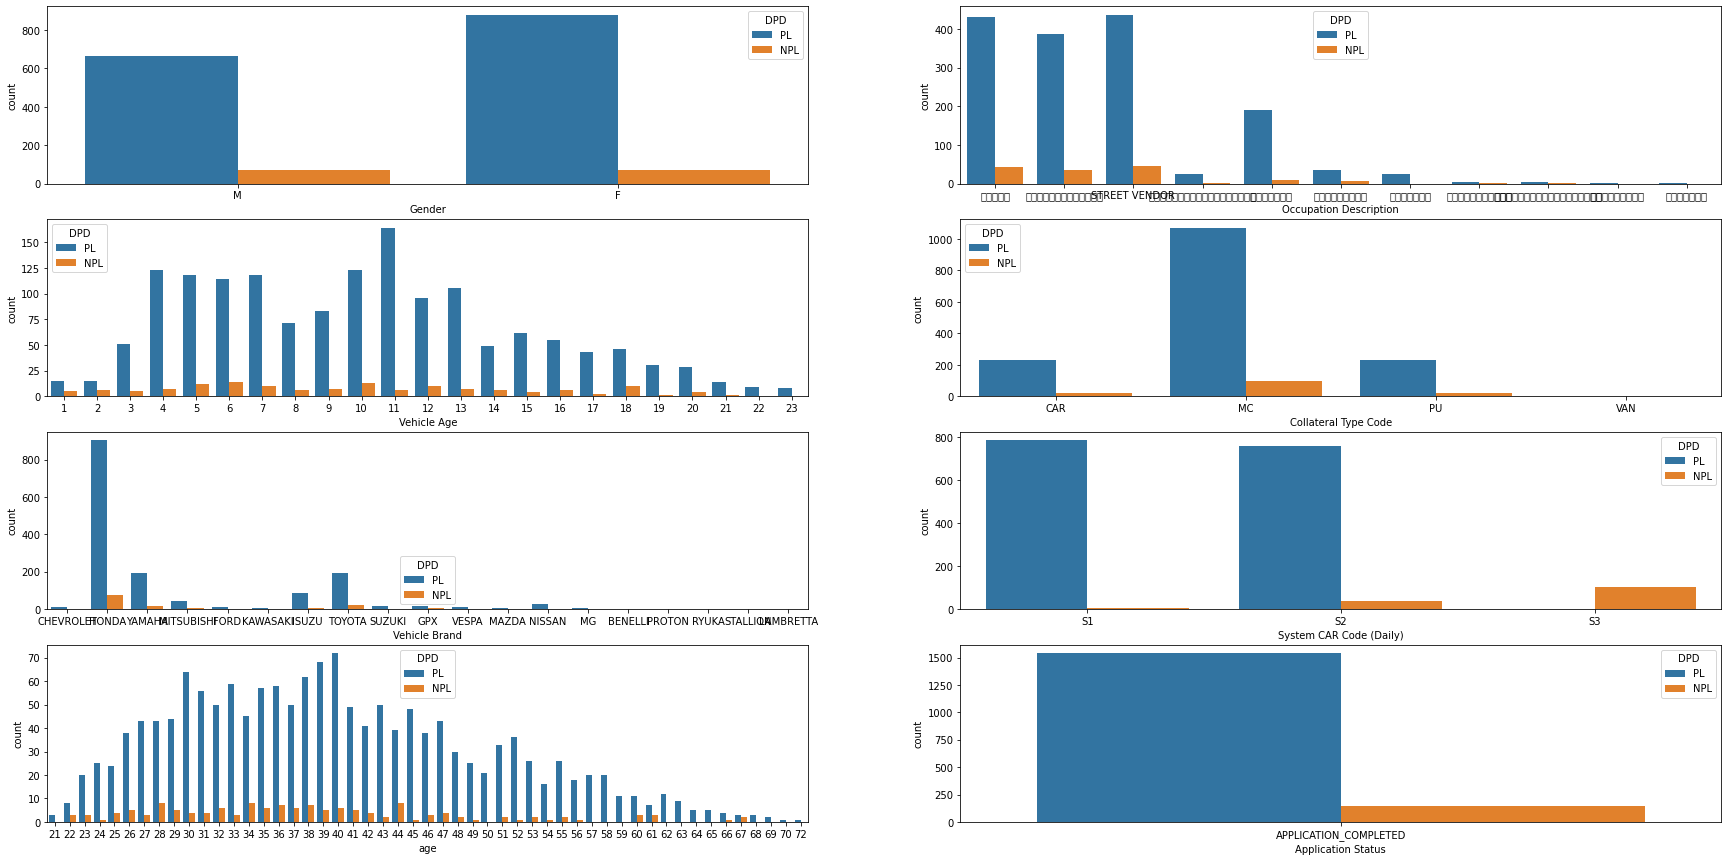

In [282]:
### Data Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt


fig,axes = plt.subplots(4,2,figsize=(30,15))
for idx,cat_col in enumerate(categorical_columns):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=train_df,hue='DPD',ax=axes[row,col])


#plt.subplots_adjust(hspace=1)

In [283]:
# fig,axes = plt.subplots(1,3,figsize=(17,5))
# for idx,cat_col in enumerate(numerical_columns):
#     sns.boxplot(y=cat_col,data=train_df,x='DPD',ax=axes[idx])

# print(train_df[numerical_columns].describe())
# plt.subplots_adjust(hspace=1)

In [284]:
# fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20,9))
# ax = ax.ravel()
# for i, col in enumerate(cols):
#     sns.violinplot(x='DPD', y=col, data=df, ax=ax[i])

# Decision Tree

In [285]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [286]:
df.columns

Index(['Application Number', 'Principal Approve Amount', '%LTV',
       'Principal Amount', '%LTV_Current', 'Repayment Tenor Month Number',
       'Gender', 'DOB', 'Occupation Description',
       'Total Income Amount (Month)', 'Collateral Type Code', 'Vehicle Brand',
       'Vehicle Model', 'Vehicle Release Year', 'Vehicle Sub Model',
       'Evaluation Amount', 'System CAR Code (Daily)', 'System CAR Code Date',
       'Final CAR Code Previous Month', 'DPD', 'Application Status', 'age',
       'Vehicle Age', 'is_npl'],
      dtype='object')

In [287]:
# sns.pairplot(df,hue='DPD',
#              kind='reg',
#              plot_kws={'scatter_kws':{'alpha':0.4},
#                        'line_kws':{'color':'orange'}},
#              diag_kws={'color':'green','alpha':.2});

In [288]:
#cols = ['Principal Approve Amount','Principal Amount','Repayment Tenor Month Number','Gender','Occupation Description','Total Income Amount (Month)','Collateral Type Code','Vehicle Brand','Vehicle Model','Vehicle Release Year','age','Vehicle Age']

In [289]:
df.columns

Index(['Application Number', 'Principal Approve Amount', '%LTV',
       'Principal Amount', '%LTV_Current', 'Repayment Tenor Month Number',
       'Gender', 'DOB', 'Occupation Description',
       'Total Income Amount (Month)', 'Collateral Type Code', 'Vehicle Brand',
       'Vehicle Model', 'Vehicle Release Year', 'Vehicle Sub Model',
       'Evaluation Amount', 'System CAR Code (Daily)', 'System CAR Code Date',
       'Final CAR Code Previous Month', 'DPD', 'Application Status', 'age',
       'Vehicle Age', 'is_npl'],
      dtype='object')

In [290]:
cols = ['Principal Approve Amount','Principal Amount','Total Income Amount (Month)','Repayment Tenor Month Number','age','Vehicle Age']


In [291]:
X=df[cols] #features
y = df['DPD'] #label

In [292]:
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_size, random_state=101
)

In [293]:
from sklearn import tree

In [294]:
model=DecisionTreeClassifier(criterion='entropy')

model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [295]:
X_train.columns

Index(['Principal Approve Amount', 'Principal Amount',
       'Total Income Amount (Month)', 'Repayment Tenor Month Number', 'age',
       'Vehicle Age'],
      dtype='object')

## Feature Importances

In [296]:
model.feature_importances_

array([0.16144903, 0.26135071, 0.19601356, 0.08561416, 0.16836119,
       0.12721134])

In [297]:
fs = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(
    ascending=False
)
fs

Principal Amount                0.261351
Total Income Amount (Month)     0.196014
age                             0.168361
Principal Approve Amount        0.161449
Vehicle Age                     0.127211
Repayment Tenor Month Number    0.085614
dtype: float64

In [298]:
fs.sum()

1.0

<AxesSubplot:>

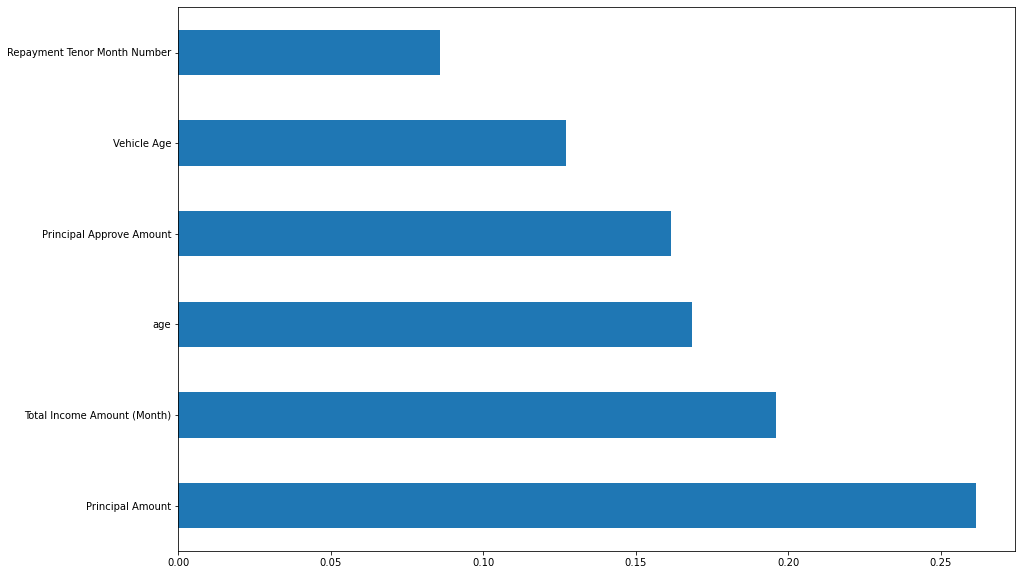

In [299]:
plt.figure(figsize=(15,10))
fs.plot(kind='barh')

##Train Test Split

In [300]:
y_train.value_counts()

PL     1239
NPL     108
Name: DPD, dtype: int64

In [301]:
df.columns

Index(['Application Number', 'Principal Approve Amount', '%LTV',
       'Principal Amount', '%LTV_Current', 'Repayment Tenor Month Number',
       'Gender', 'DOB', 'Occupation Description',
       'Total Income Amount (Month)', 'Collateral Type Code', 'Vehicle Brand',
       'Vehicle Model', 'Vehicle Release Year', 'Vehicle Sub Model',
       'Evaluation Amount', 'System CAR Code (Daily)', 'System CAR Code Date',
       'Final CAR Code Previous Month', 'DPD', 'Application Status', 'age',
       'Vehicle Age', 'is_npl'],
      dtype='object')

In [302]:
X = df[['Principal Approve Amount','Principal Amount','Repayment Tenor Month Number','Total Income Amount (Month)','age','Vehicle Age']]
y = df['DPD']

In [303]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X ,y ,test_size=0.3, random_state=0)
X_train.shape

(1178, 6)

### Feature Scaling -> StandardScarler

In [304]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc = sc_X.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

### Feature Scaling -> MinMaxScaler

In [305]:
#MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
print(scaler.fit_transform(X_train)[:5])
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

[[0.05387205 0.05652594 0.08333333 0.23816612 0.12       0.18181818]
 [0.08417508 0.08669917 0.16666667 0.26793689 0.48       0.        ]
 [0.09090909 0.07392036 0.08333333 0.38701995 0.04       0.27272727]
 [0.39393939 0.39456561 0.5        0.87109259 0.34       0.72727273]
 [0.08080808 0.08298302 0.33333333 0.23816612 0.5        0.45454545]]


In [306]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='entropy')
classifier = model.fit(X_train,y_train)
classifier

DecisionTreeClassifier(criterion='entropy')

In [307]:
#prediction
y_pred = classifier.predict(X_test)
from sklearn import metrics
#Accuracy
print('Accuracy Score:', metrics.accuracy_score(y_test, y_pred)*100)

Accuracy Score: 85.17786561264822


[Text(954.051724137931, 1333.8333333333333, 'node #0\nPrincipal Amount <= 0.1\nentropy = 0.416\nsamples = 1178\nvalue = [99, 1079]\nclass = PL'),
 Text(445.7586206896552, 1283.5, 'node #1\nPrincipal Approve Amount <= 0.075\nentropy = 0.335\nsamples = 744\nvalue = [46, 698]\nclass = PL'),
 Text(269.37931034482756, 1233.1666666666667, 'node #2\nPrincipal Amount <= 0.077\nentropy = 0.413\nsamples = 433\nvalue = [36, 397]\nclass = PL'),
 Text(153.9310344827586, 1182.8333333333333, 'node #3\nage <= 0.03\nentropy = 0.387\nsamples = 423\nvalue = [32, 391]\nclass = PL'),
 Text(102.62068965517241, 1132.5, 'node #4\nVehicle Age <= 0.523\nentropy = 0.918\nsamples = 9\nvalue = [3, 6]\nclass = PL'),
 Text(76.9655172413793, 1082.1666666666665, 'node #5\nTotal Income Amount (Month) <= 0.074\nentropy = 0.592\nsamples = 7\nvalue = [1, 6]\nclass = PL'),
 Text(51.310344827586206, 1031.8333333333333, 'node #6\nage <= 0.01\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]\nclass = NPL'),
 Text(25.655172413793103

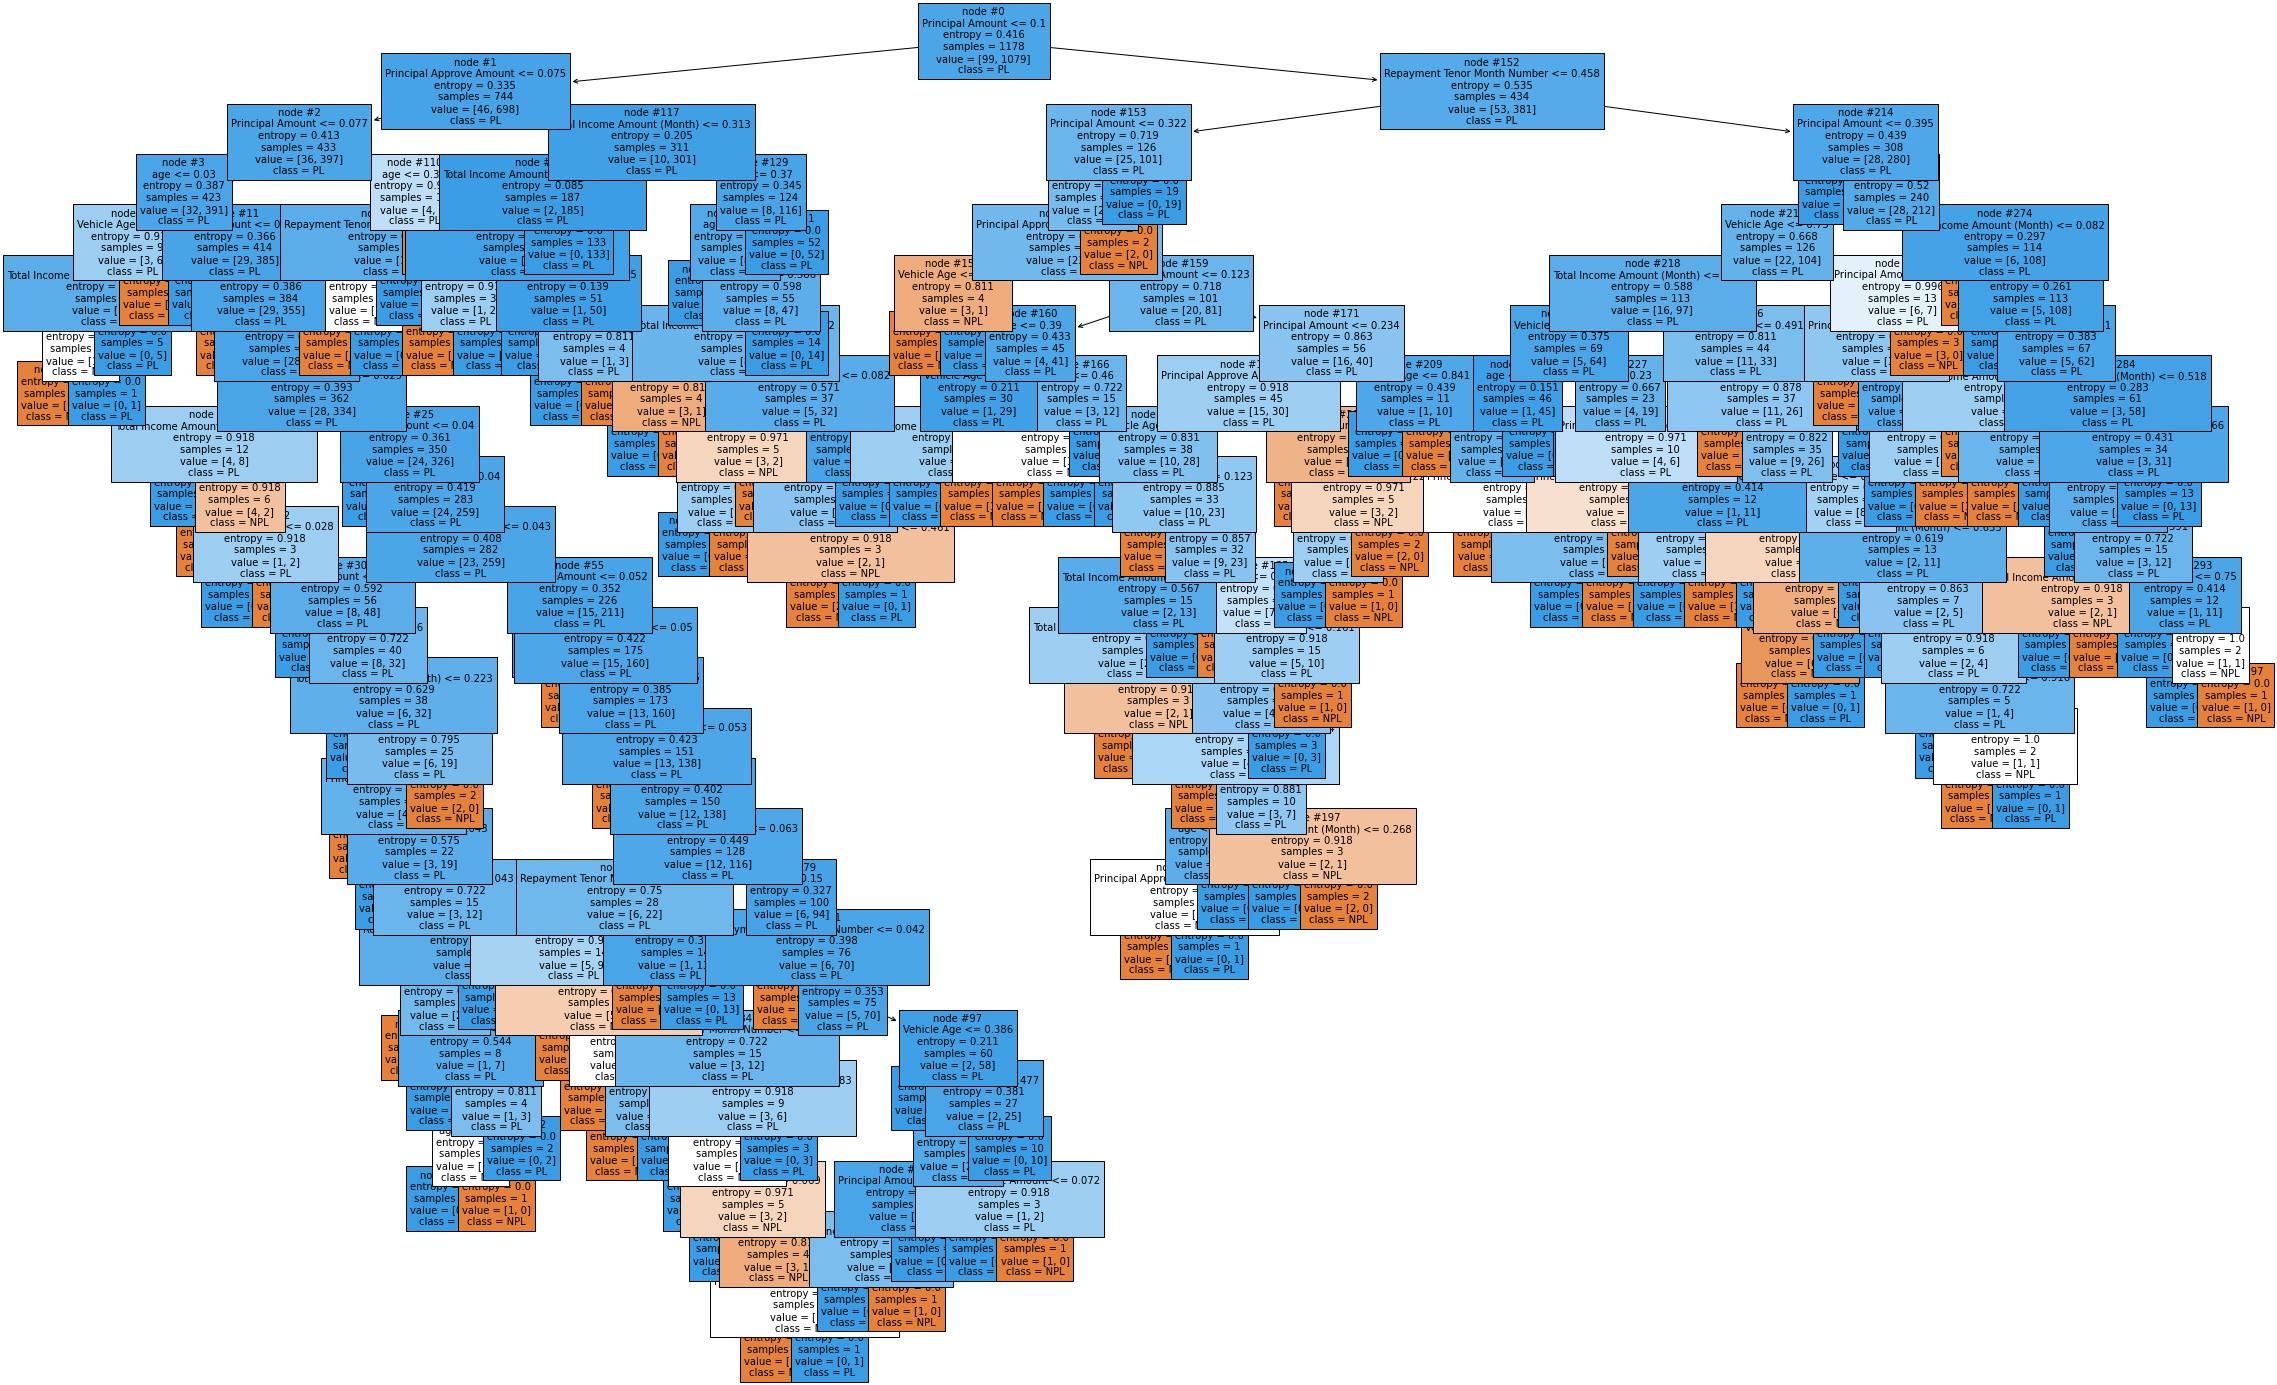

In [308]:
from sklearn import tree
plt.figure(figsize=(40,25))
tree.plot_tree(classifier, 
                   feature_names=['Principal Approve Amount','Principal Amount','Repayment Tenor Month Number','Total Income Amount (Month)','age','Vehicle Age'],  
                   class_names=['NPL','PL'],
                   filled=True,node_ids=True,fontsize=10)

In [309]:
# Create Decision Tree classifer object
# Train Decision Tree Classifer
classifier = DecisionTreeClassifier(criterion="entropy", max_depth=4)
#Predict the response for test dataset
classifier = classifier.fit(X_train, y_train)
# Model Accuracy, how often is the classifier correct?
y_pred = classifier.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 91.50197628458498


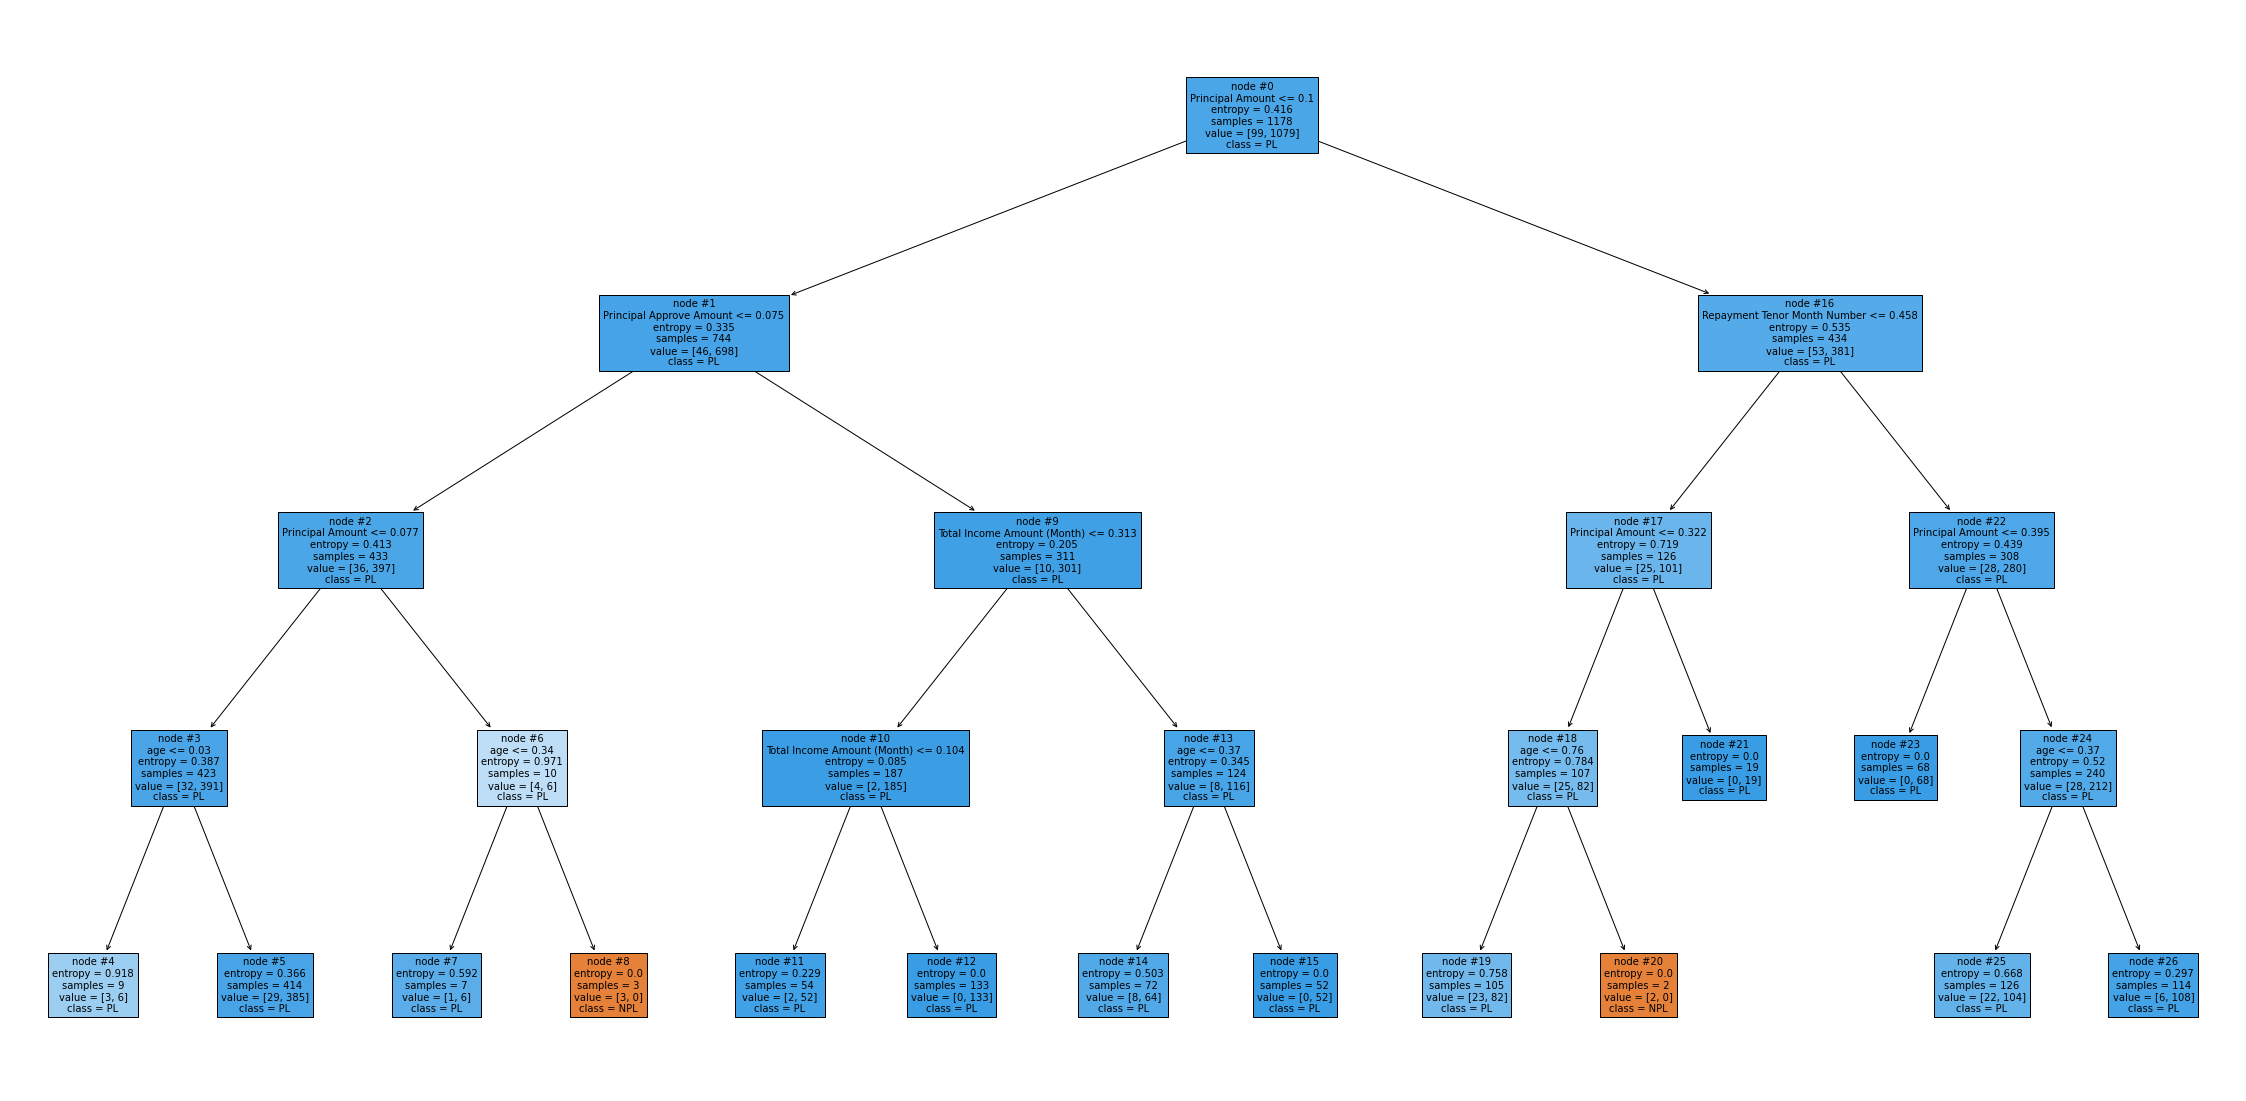

In [310]:
from sklearn import tree
fig = plt.figure(figsize=(40,20))
_ = tree.plot_tree(classifier, 
                   feature_names=['Principal Approve Amount','Principal Amount','Repayment Tenor Month Number','Total Income Amount (Month)','age','Vehicle Age'],
                   class_names=['NPL','PL'],
                   filled=True,node_ids=True, fontsize=10)

In [311]:
import graphviz

ModuleNotFoundError: No module named 'graphviz'

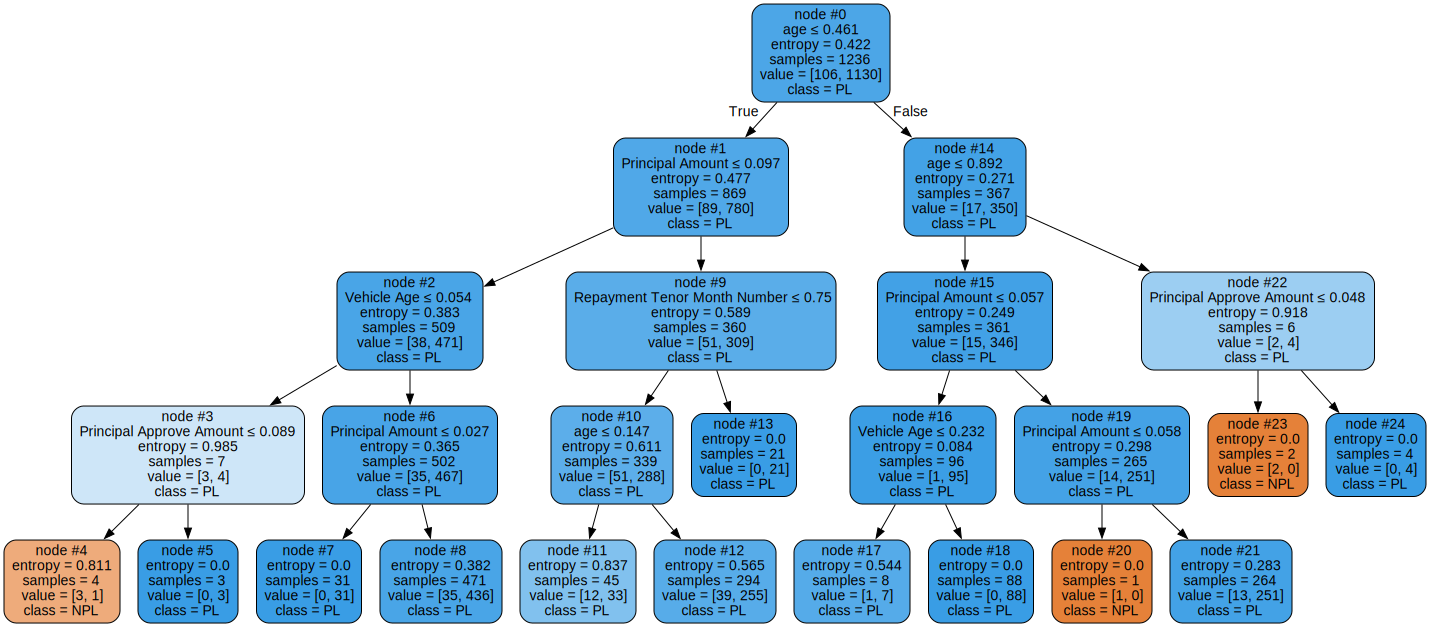

In [ ]:
dot_data = tree.export_graphviz(classifier, out_file=None,
                                feature_names=['Principal Approve Amount','Principal Amount','Repayment Tenor Month Number','Total Income Amount (Month)','age','Vehicle Age'],  
                                class_names=['NPL','PL'],
                                filled=True, rounded=True,
                                node_ids=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [ ]:
#df.to_csv('/content/drive/MyDrive/Colab Notebooks/IS/chaiyo22.csv')

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import metrics

In [ ]:
model = RandomForestClassifier(n_estimators=250, random_state=101)
classifier = model.fit(X_train,y_train)
classifier

RandomForestClassifier(n_estimators=250, random_state=101)

In [ ]:
#prediction
y_pred = classifier.predict(X_test)
from sklearn import metrics
#Accuracy
print('Accuracy Score:', metrics.accuracy_score(y_test, y_pred)*100)

Accuracy Score: 90.6930693069307


In [ ]:
model.feature_importances_

array([0.18559822, 0.23264173, 0.07530104, 0.15283239, 0.20326255,
       0.15036408])

In [ ]:
# Create Decision Tree classifer object
# Train Decision Tree Classifer
classifier = RandomForestClassifier(n_estimators=250, random_state=101)
#Predict the response for test dataset
classifier = classifier.fit(X_train, y_train)
# Model Accuracy, how often is the classifier correct?
y_pred = classifier.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 90.6930693069307


# Decision Tree 2

In [ ]:
df2 = df.copy()

In [ ]:
df2.to_csv('chaiyo22.csv')

In [ ]:
df2 = pd.read_csv('chaiyo22.csv')

In [ ]:
df2.head(5)

Unnamed: 0 Application Number  Principal Approve Amount  Principal Amount  \
0          10  25650621ULCR00004                   30000.0          26618.83   
1          22  25650621ULMB00060                   20000.0          18434.00   
2          61  25650623ULMB00007                   28000.0          26483.19   
3          64  25650623REUM00003                   51000.0          50715.88   
4          69  25650623ULMB00021                   14000.0          13975.46   

   Repayment Tenor Month Number Gender         DOB Occupation Description  \
0                            24      M  1994-12-24                  อื่นๆ   
1                            12      M  1994-01-26                  อื่นๆ   
2                            24      F  1989-12-30                  อื่นๆ   
3                            36      F  1995-04-10                  อื่นๆ   
4                            36      F  1982-10-22          พนักงานบริษัท   

   Total Income Amount (Month) Collateral Type Code  ... Vehicle Sub Model  \
0                      40000.0                  CAR  ...                BT   
1                      15000.0                   MC  ...                DB   
2                      15000.0                   MC  ...                CC   
3                      10000.0                   MC  ...                BV   
4                      13000.0                   MC  ...                AF   

  Evaluation Amount  System CAR Code (Daily) System CAR Code Date  \
0            121000                       S1           2022-06-21   
1             34500                       S2           2023-01-10   
2             44000                       S2           2022-11-27   
3             64500                       S3           2022-12-29   
4             19000                       S2           2022-12-07   

   Final CAR Code Previous Month  DPD     Application Status age Vehicle Age  \
0                             S1   PL  APPLICATION_COMPLETED  29          11   
1                             S3  NPL  APPLICATION_COMPLETED  29           4   
2                             S1  NPL  APPLICATION_COMPLETED  34           8   
3                             S2  NPL  APPLICATION_COMPLETED  28           5   
4                             S1   PL  APPLICATION_COMPLETED  41          14   

  is_npl  
0      0  
1      1  
2      1  
3      1  
4      0  

[5 rows x 23 columns]

In [ ]:
print(df2.columns)

Index(['Unnamed: 0', 'Application Number', 'Principal Approve Amount',
       'Principal Amount', 'Repayment Tenor Month Number', 'Gender', 'DOB',
       'Occupation Description', 'Total Income Amount (Month)',
       'Collateral Type Code', 'Vehicle Brand', 'Vehicle Model',
       'Vehicle Release Year', 'Vehicle Sub Model', 'Evaluation Amount',
       'System CAR Code (Daily)', 'System CAR Code Date',
       'Final CAR Code Previous Month', 'DPD', 'Application Status', 'age',
       'Vehicle Age', 'is_npl'],
      dtype='object')


## Drop Columns ที่ไม่จำเป็น

In [ ]:
cols = ['Application Number','Principal Approve Amount','DOB', 'Vehicle Sub Model', 'Evaluation Amount',
       'System CAR Code (Daily)','Vehicle Model',
       'System CAR Code Date', 'Final CAR Code Previous Month','Application Status']
df2 = df2.drop(columns=cols, axis=1)
df2.head()

Unnamed: 0  Principal Amount  Repayment Tenor Month Number Gender  \
0          10          26618.83                            24      M   
1          22          18434.00                            12      M   
2          61          26483.19                            24      F   
3          64          50715.88                            36      F   
4          69          13975.46                            36      F   

  Occupation Description  Total Income Amount (Month) Collateral Type Code  \
0                  อื่นๆ                      40000.0                  CAR   
1                  อื่นๆ                      15000.0                   MC   
2                  อื่นๆ                      15000.0                   MC   
3                  อื่นๆ                      10000.0                   MC   
4          พนักงานบริษัท                      13000.0                   MC   

  Vehicle Brand  Vehicle Release Year  DPD  age  Vehicle Age  is_npl  
0     CHEVROLET                  2012   PL   29           11       0  
1         HONDA                  2019  NPL   29            4       1  
2         HONDA                  2015  NPL   34            8       1  
3         HONDA                  2018  NPL   28            5       1  
4         HONDA                  2009   PL   41           14       0

In [ ]:
# sns.pairplot(df2,hue='DPD',
#              kind='reg',
#              plot_kws={'scatter_kws':{'alpha':0.4},
#                        'line_kws':{'color':'orange'}},
#              diag_kws={'color':'green','alpha':.2});

## Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender','Occupation Description','Collateral Type Code','Vehicle Brand']
le = LabelEncoder()
for col in cols:
    df2[col] = le.fit_transform(df2[col])

In [ ]:
df2.head()

Unnamed: 0  Principal Amount  Repayment Tenor Month Number  Gender  \
0          10          26618.83                            24       1   
1          22          18434.00                            12       1   
2          61          26483.19                            24       0   
3          64          50715.88                            36       0   
4          69          13975.46                            36       0   

   Occupation Description  Total Income Amount (Month)  Collateral Type Code  \
0                       8                      40000.0                     0   
1                       8                      15000.0                     1   
2                       8                      15000.0                     1   
3                       8                      10000.0                     1   
4                       4                      13000.0                     1   

   Vehicle Brand  Vehicle Release Year  DPD  age  Vehicle Age  is_npl  
0              1                  2012   PL   29           11       0  
1              4                  2019  NPL   29            4       1  
2              4                  2015  NPL   34            8       1  
3              4                  2018  NPL   28            5       1  
4              4                  2009   PL   41           14       0

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    1682 non-null   int64  
 1   Principal Amount              1682 non-null   float64
 2   Repayment Tenor Month Number  1682 non-null   int64  
 3   Gender                        1682 non-null   int32  
 4   Occupation Description        1682 non-null   int32  
 5   Total Income Amount (Month)   1682 non-null   float64
 6   Collateral Type Code          1682 non-null   int32  
 7   Vehicle Brand                 1682 non-null   int32  
 8   Vehicle Release Year          1682 non-null   int64  
 9   DPD                           1682 non-null   object 
 10  age                           1682 non-null   int64  
 11  Vehicle Age                   1682 non-null   int64  
 12  is_npl                        1682 non-null   int64  
dtypes: 

In [ ]:
corr = df2.corr()
corr

Unnamed: 0  Principal Amount  \
Unnamed: 0                      1.000000         -0.142296   
Principal Amount               -0.142296          1.000000   
Repayment Tenor Month Number    0.031456          0.752132   
Gender                         -0.092649          0.060340   
Occupation Description          0.037976         -0.066290   
Total Income Amount (Month)    -0.105978          0.312928   
Collateral Type Code           -0.000445          0.188586   
Vehicle Brand                  -0.057195          0.240165   
Vehicle Release Year            0.065696         -0.298349   
age                             0.009687          0.086393   
Vehicle Age                    -0.065696          0.298349   
is_npl                         -0.278027          0.023964   

                              Repayment Tenor Month Number    Gender  \
Unnamed: 0                                        0.031456 -0.092649   
Principal Amount                                  0.752132  0.060340   
Repayment Tenor Month Number                      1.000000  0.006306   
Gender                                            0.006306  1.000000   
Occupation Description                           -0.058052  0.126732   
Total Income Amount (Month)                       0.202549  0.040945   
Collateral Type Code                              0.050487  0.107369   
Vehicle Brand                                     0.176375  0.006783   
Vehicle Release Year                             -0.292265 -0.044749   
age                                               0.041103  0.019987   
Vehicle Age                                       0.292265  0.044749   
is_npl                                           -0.002702  0.046029   

                              Occupation Description  \
Unnamed: 0                                  0.037976   
Principal Amount                           -0.066290   
Repayment Tenor Month Number               -0.058052   
Gender                                      0.126732   
Occupation Description                      1.000000   
Total Income Amount (Month)                -0.270709   
Collateral Type Code                        0.082433   
Vehicle Brand                              -0.081681   
Vehicle Release Year                        0.020198   
age                                         0.019845   
Vehicle Age                                -0.020198   
is_npl                                     -0.037518   

                              Total Income Amount (Month)  \
Unnamed: 0                                      -0.105978   
Principal Amount                                 0.312928   
Repayment Tenor Month Number                     0.202549   
Gender                                           0.040945   
Occupation Description                          -0.270709   
Total Income Amount (Month)                      1.000000   
Collateral Type Code                             0.016744   
Vehicle Brand                                    0.110520   
Vehicle Release Year                            -0.107091   
age                                              0.099299   
Vehicle Age                                      0.107091   
is_npl                                           0.061410   

                              Collateral Type Code  Vehicle Brand  \
Unnamed: 0                               -0.000445      -0.057195   
Principal Amount                          0.188586       0.240165   
Repayment Tenor Month Number              0.050487       0.176375   
Gender                                    0.107369       0.006783   
Occupation Description                    0.082433      -0.081681   
Total Income Amount (Month)               0.016744       0.110520   
Collateral Type Code                      1.000000       0.037124   
Vehicle Brand                             0.037124       1.000000   
Vehicle Release Year                     -0.003150      -0.208629   
age                                       0.093165       0.093070   
Vehi

<AxesSubplot:>

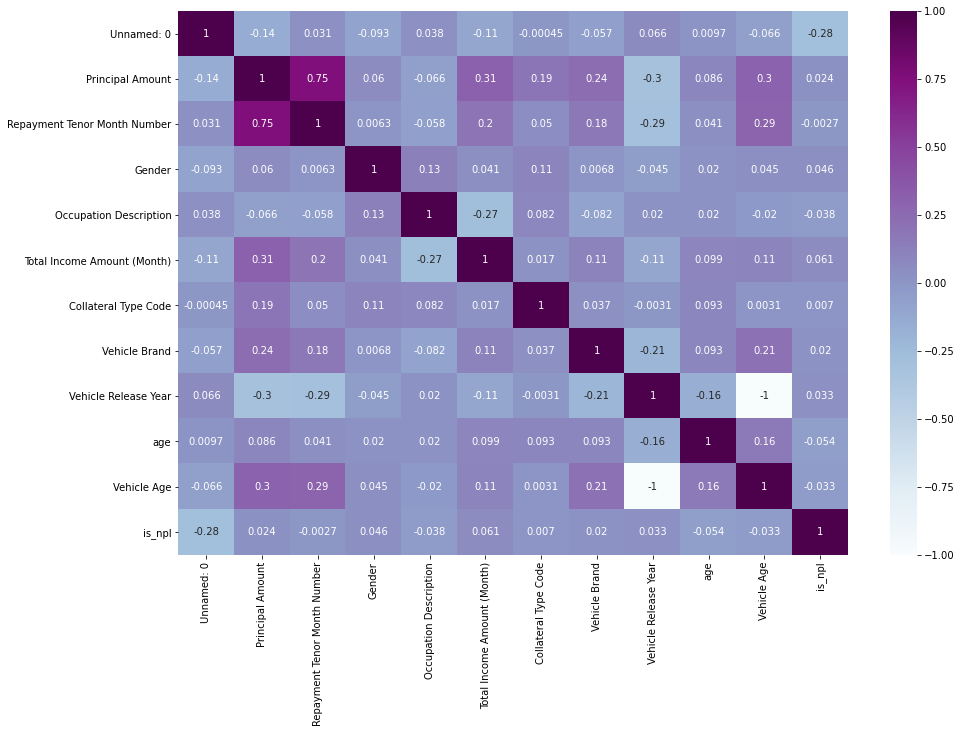

In [ ]:
corr = df2.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True, cmap="BuPu")

## rain Test Split

In [ ]:
X = df2.drop(columns=['DPD'], axis=1)
y = df2['DPD']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Model Training

In [ ]:
from sklearn.model_selection import cross_val_score
def classify(model, x,y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)
    model.fit(x_train, y_train)
    print("Accuracy is : ", model.score(x_test, y_test)*100)
    #Cross Calidation
    #eg: cv-5, train-4, test-1
    score = cross_val_score(model, x, y, cv=10)
    print("Cross Validation is ", np.mean(score)*100)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model,X,y)

Accuracy is :  91.68316831683168
Cross Validation is  84.81262327416174


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model,X,y)

Accuracy is :  100.0
Cross Validation is  100.0


In [ ]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
model = RandomForestClassifier()
classify(model,X,y)

Accuracy is :  100.0
Cross Validation is  100.0


In [ ]:
model = ExtraTreesClassifier()
classify(model,X,y)

Accuracy is :  100.0
Cross Validation is  100.0


In [ ]:
# sns.pairplot(df2,hue='DPD',
#              kind='reg',
#              plot_kws={'scatter_kws':{'alpha':0.4},
#                        'line_kws':{'color':'orange'}},
#              diag_kws={'color':'green','alpha':.2});

In [ ]:
print(df2.columns)

Index(['Unnamed: 0', 'Principal Amount', 'Repayment Tenor Month Number',
       'Gender', 'Occupation Description', 'Total Income Amount (Month)',
       'Collateral Type Code', 'Vehicle Brand', 'Vehicle Release Year', 'DPD',
       'age', 'Vehicle Age', 'is_npl'],
      dtype='object')


In [ ]:
cols = ['Principal Amount','Repayment Tenor Month Number', 'Gender', 'Occupation Description',
        'Total Income Amount (Month)', 'Collateral Type Code', 'Vehicle Brand','Vehicle Release Year','age', 'Vehicle Age']

In [ ]:
X=df2[cols] #features
y = df2['DPD'] #label

In [ ]:
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_size, stratify=y, random_state=101
)

In [ ]:
from sklearn import tree

In [ ]:
model=DecisionTreeClassifier(criterion='entropy')

model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
X_train.columns

Index(['Principal Amount', 'Repayment Tenor Month Number', 'Gender',
       'Occupation Description', 'Total Income Amount (Month)',
       'Collateral Type Code', 'Vehicle Brand', 'Vehicle Release Year', 'age',
       'Vehicle Age'],
      dtype='object')

In [ ]:
model.feature_importances_

array([0.22539116, 0.07700424, 0.01585886, 0.05989768, 0.17833439,
       0.00253987, 0.0514685 , 0.0854385 , 0.22780647, 0.07626033])

In [ ]:
fs = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(
    ascending=False
)
fs

age                             0.227806
Principal Amount                0.225391
Total Income Amount (Month)     0.178334
Vehicle Release Year            0.085439
Repayment Tenor Month Number    0.077004
Vehicle Age                     0.076260
Occupation Description          0.059898
Vehicle Brand                   0.051468
Gender                          0.015859
Collateral Type Code            0.002540
dtype: float64

In [ ]:
fs.sum()

1.0000000000000002

<AxesSubplot:>

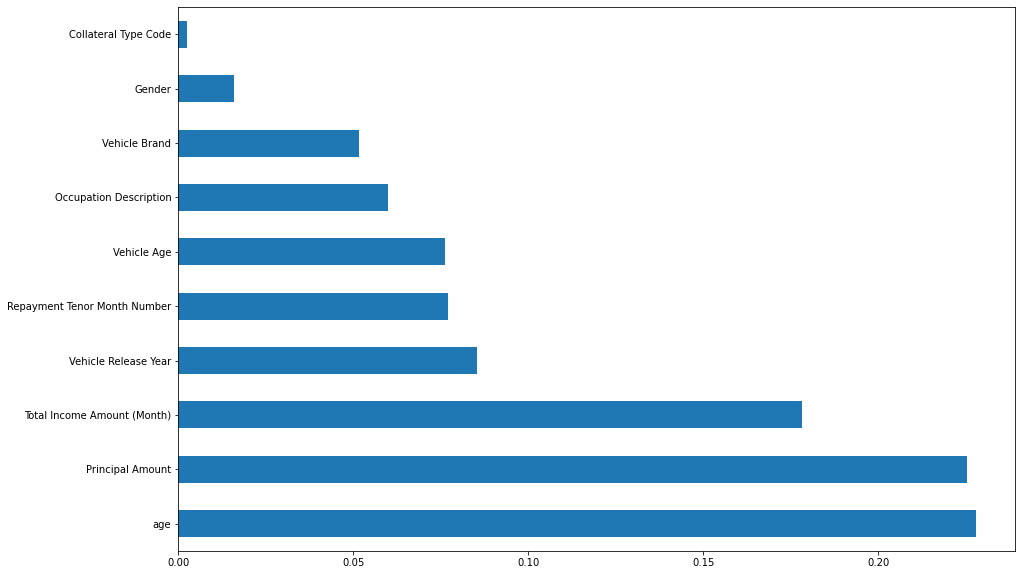

In [ ]:
plt.figure(figsize=(15,10))
fs.plot(kind='barh')

In [ ]:
y_train.value_counts()

PL     1078
NPL      99
Name: DPD, dtype: int64

In [ ]:
X = df2[['Principal Amount','Repayment Tenor Month Number', 'Gender', 'Occupation Description','Total Income Amount (Month)', 'Collateral Type Code', 'Vehicle Brand', 'age', 'Vehicle Age']]
y = df2['DPD']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X ,y ,test_size=0.3, random_state=0)
X_train.shape

(1177, 9)

In [ ]:
'''#feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc = sc_X.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)'''

'#feature scaling\nfrom sklearn.preprocessing import StandardScaler\nsc_X = StandardScaler()\nsc = sc_X.fit(X_train)\nX_train = sc.transform(X_train)\nX_test = sc.transform(X_test)'

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='entropy')
classifier = model.fit(X_train,y_train)
classifier

DecisionTreeClassifier(criterion='entropy')

In [ ]:
#prediction
y_pred = classifier.predict(X_test)
from sklearn import metrics
#Accuracy
print('Accuracy Score:', metrics.accuracy_score(y_test, y_pred)*100)

Accuracy Score: 82.17821782178217


In [ ]:
df2.columns

Index(['Unnamed: 0', 'Principal Amount', 'Repayment Tenor Month Number',
       'Gender', 'Occupation Description', 'Total Income Amount (Month)',
       'Collateral Type Code', 'Vehicle Brand', 'Vehicle Release Year', 'DPD',
       'age', 'Vehicle Age', 'is_npl'],
      dtype='object')

[Text(949.7013157894736, 1326.642857142857, 'node #0\nPrincipal Amount <= 29983.805\nentropy = 0.408\nsamples = 1177\nvalue = [96, 1081]\nclass = PL'),
 Text(371.14342105263154, 1261.9285714285716, 'node #1\nage <= 34.5\nentropy = 0.296\nsamples = 708\nvalue = [37, 671]\nclass = PL'),
 Text(131.42368421052632, 1197.2142857142858, 'node #2\nVehicle Age <= 2.5\nentropy = 0.434\nsamples = 258\nvalue = [23, 235]\nclass = PL'),
 Text(52.86315789473684, 1132.5, 'node #3\nRepayment Tenor Month Number <= 54.0\nentropy = 0.918\nsamples = 3\nvalue = [2, 1]\nclass = NPL'),
 Text(29.368421052631575, 1067.7857142857142, 'node #4\nentropy = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = NPL'),
 Text(76.3578947368421, 1067.7857142857142, 'node #5\nentropy = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = PL'),
 Text(209.98421052631576, 1132.5, 'node #6\nVehicle Brand <= 3.5\nentropy = 0.41\nsamples = 255\nvalue = [21, 234]\nclass = PL'),
 Text(123.34736842105262, 1067.7857142857142, 'node #7\nOccupation Descrip

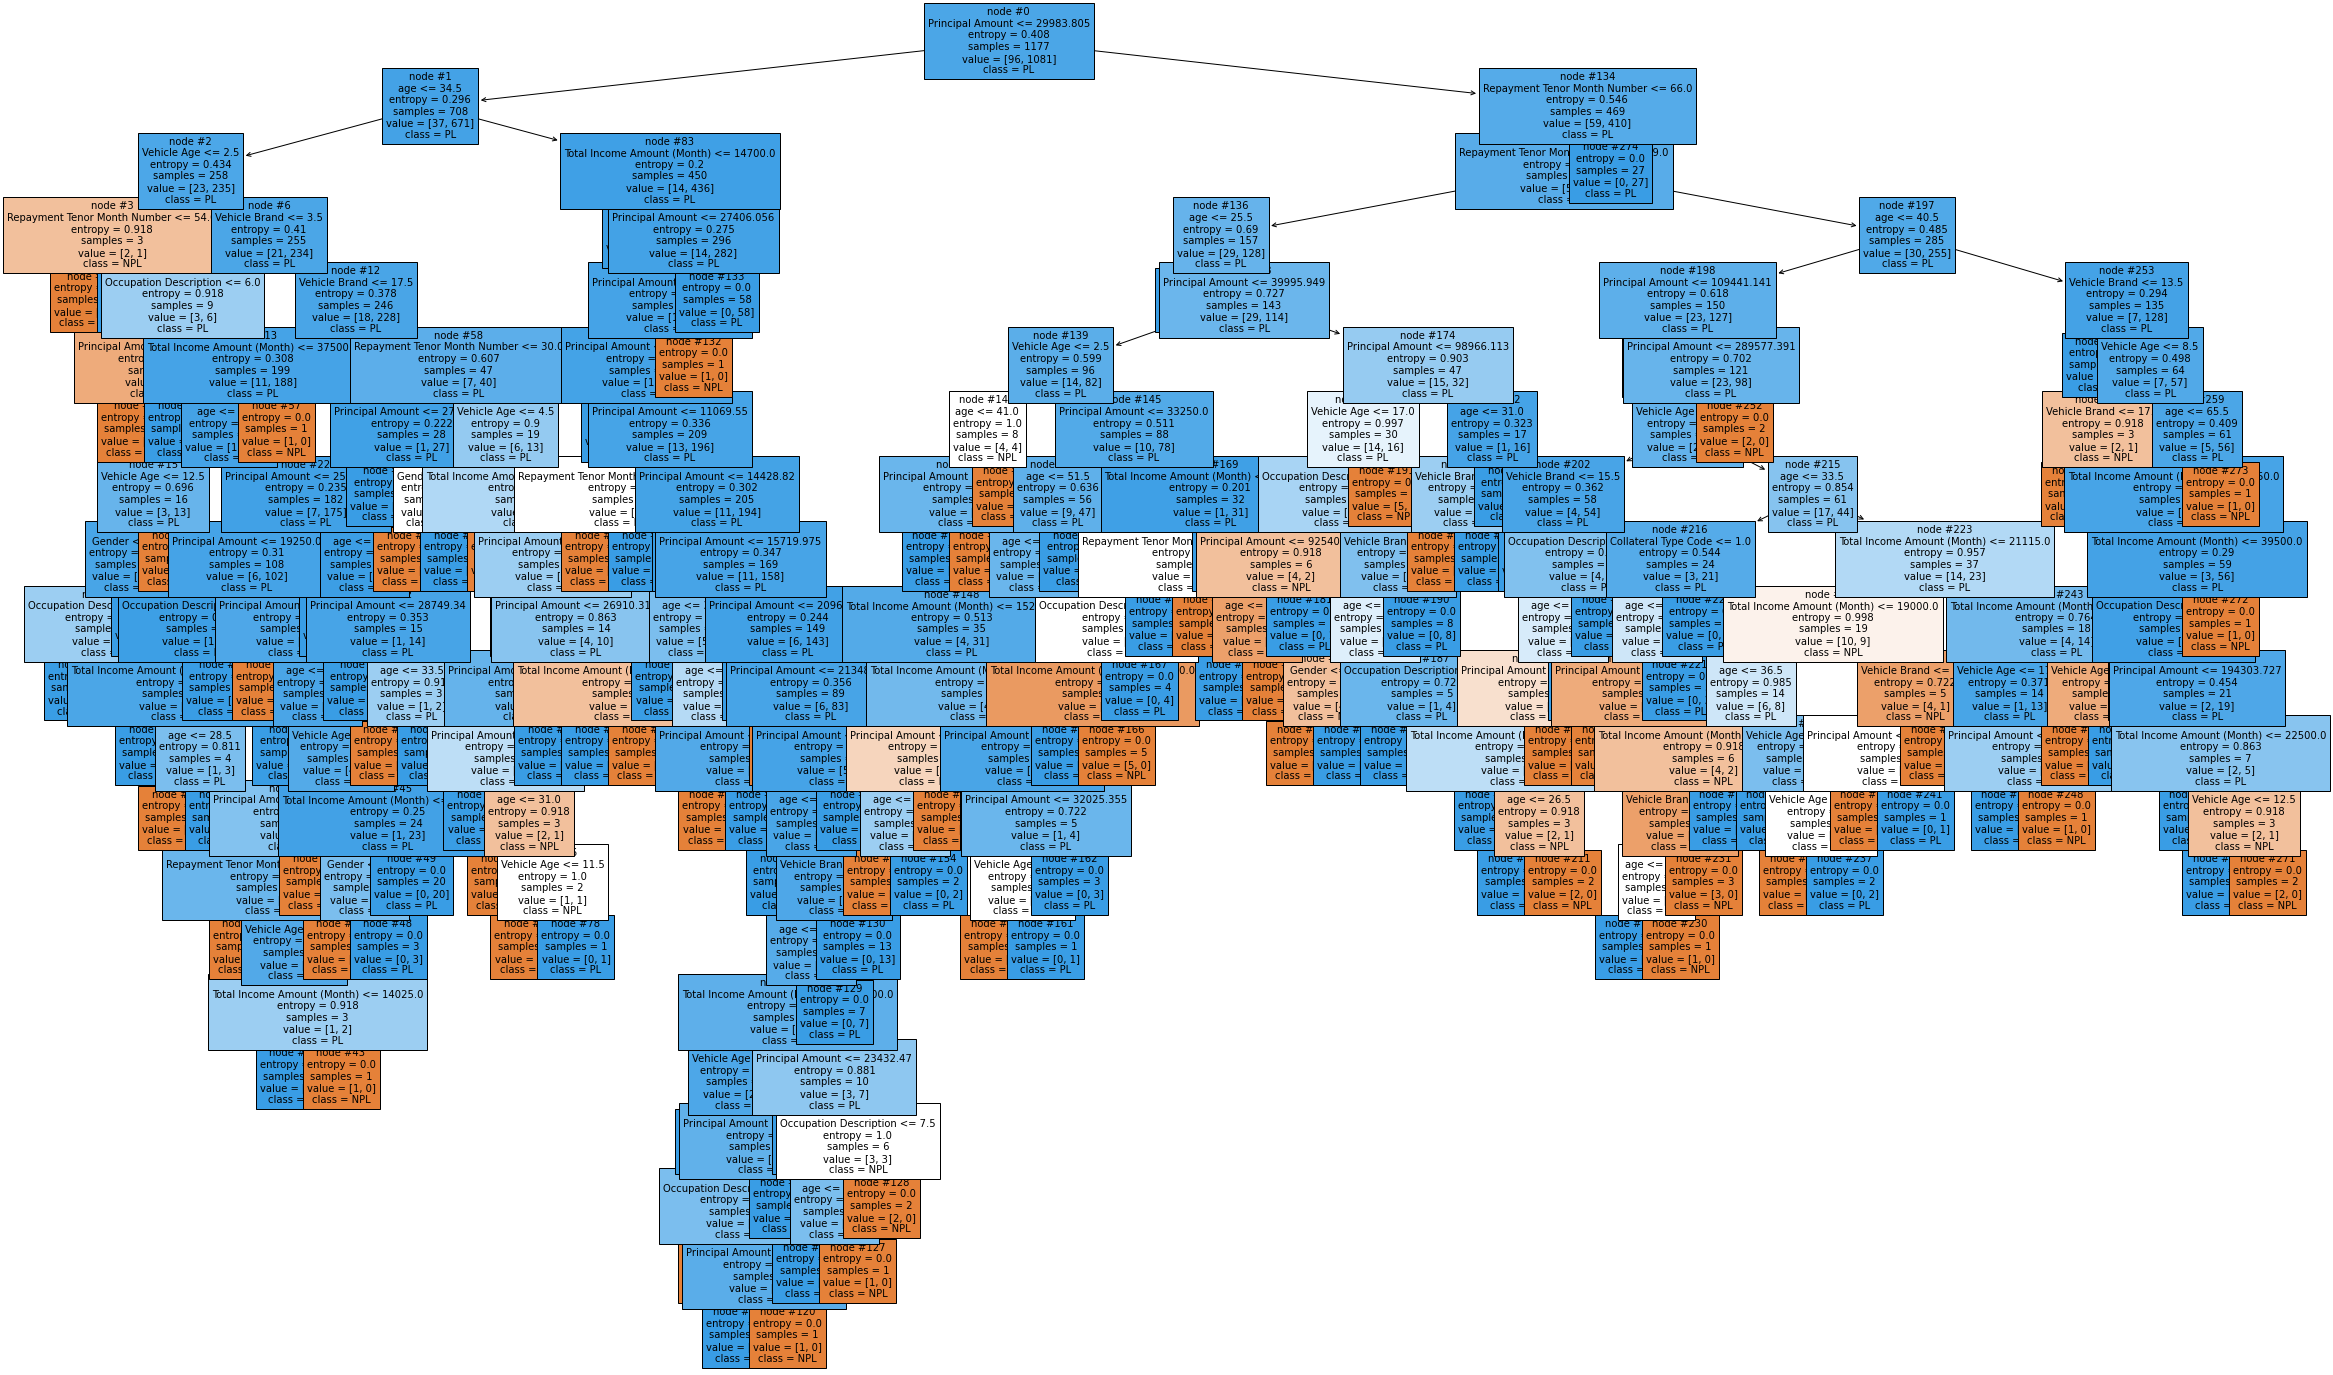

In [ ]:
from sklearn import tree
plt.figure(figsize=(40,25))
tree.plot_tree(classifier, 
                   feature_names=['Principal Amount', 'Repayment Tenor Month Number', 'Gender','Occupation Description', 'Total Income Amount (Month)', 'Collateral Type Code', 'Vehicle Brand', 'age', 'Vehicle Age'],  
                   class_names=['NPL','PL'],
                   filled=True,node_ids=True,fontsize=10)

In [ ]:
# Create Decision Tree classifer object
# Train Decision Tree Classifer
classifier = DecisionTreeClassifier(criterion="entropy", max_depth=5)
#Predict the response for test dataset
classifier = classifier.fit(X_train, y_train)
# Model Accuracy, how often is the classifier correct?
y_pred = classifier.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 90.6930693069307


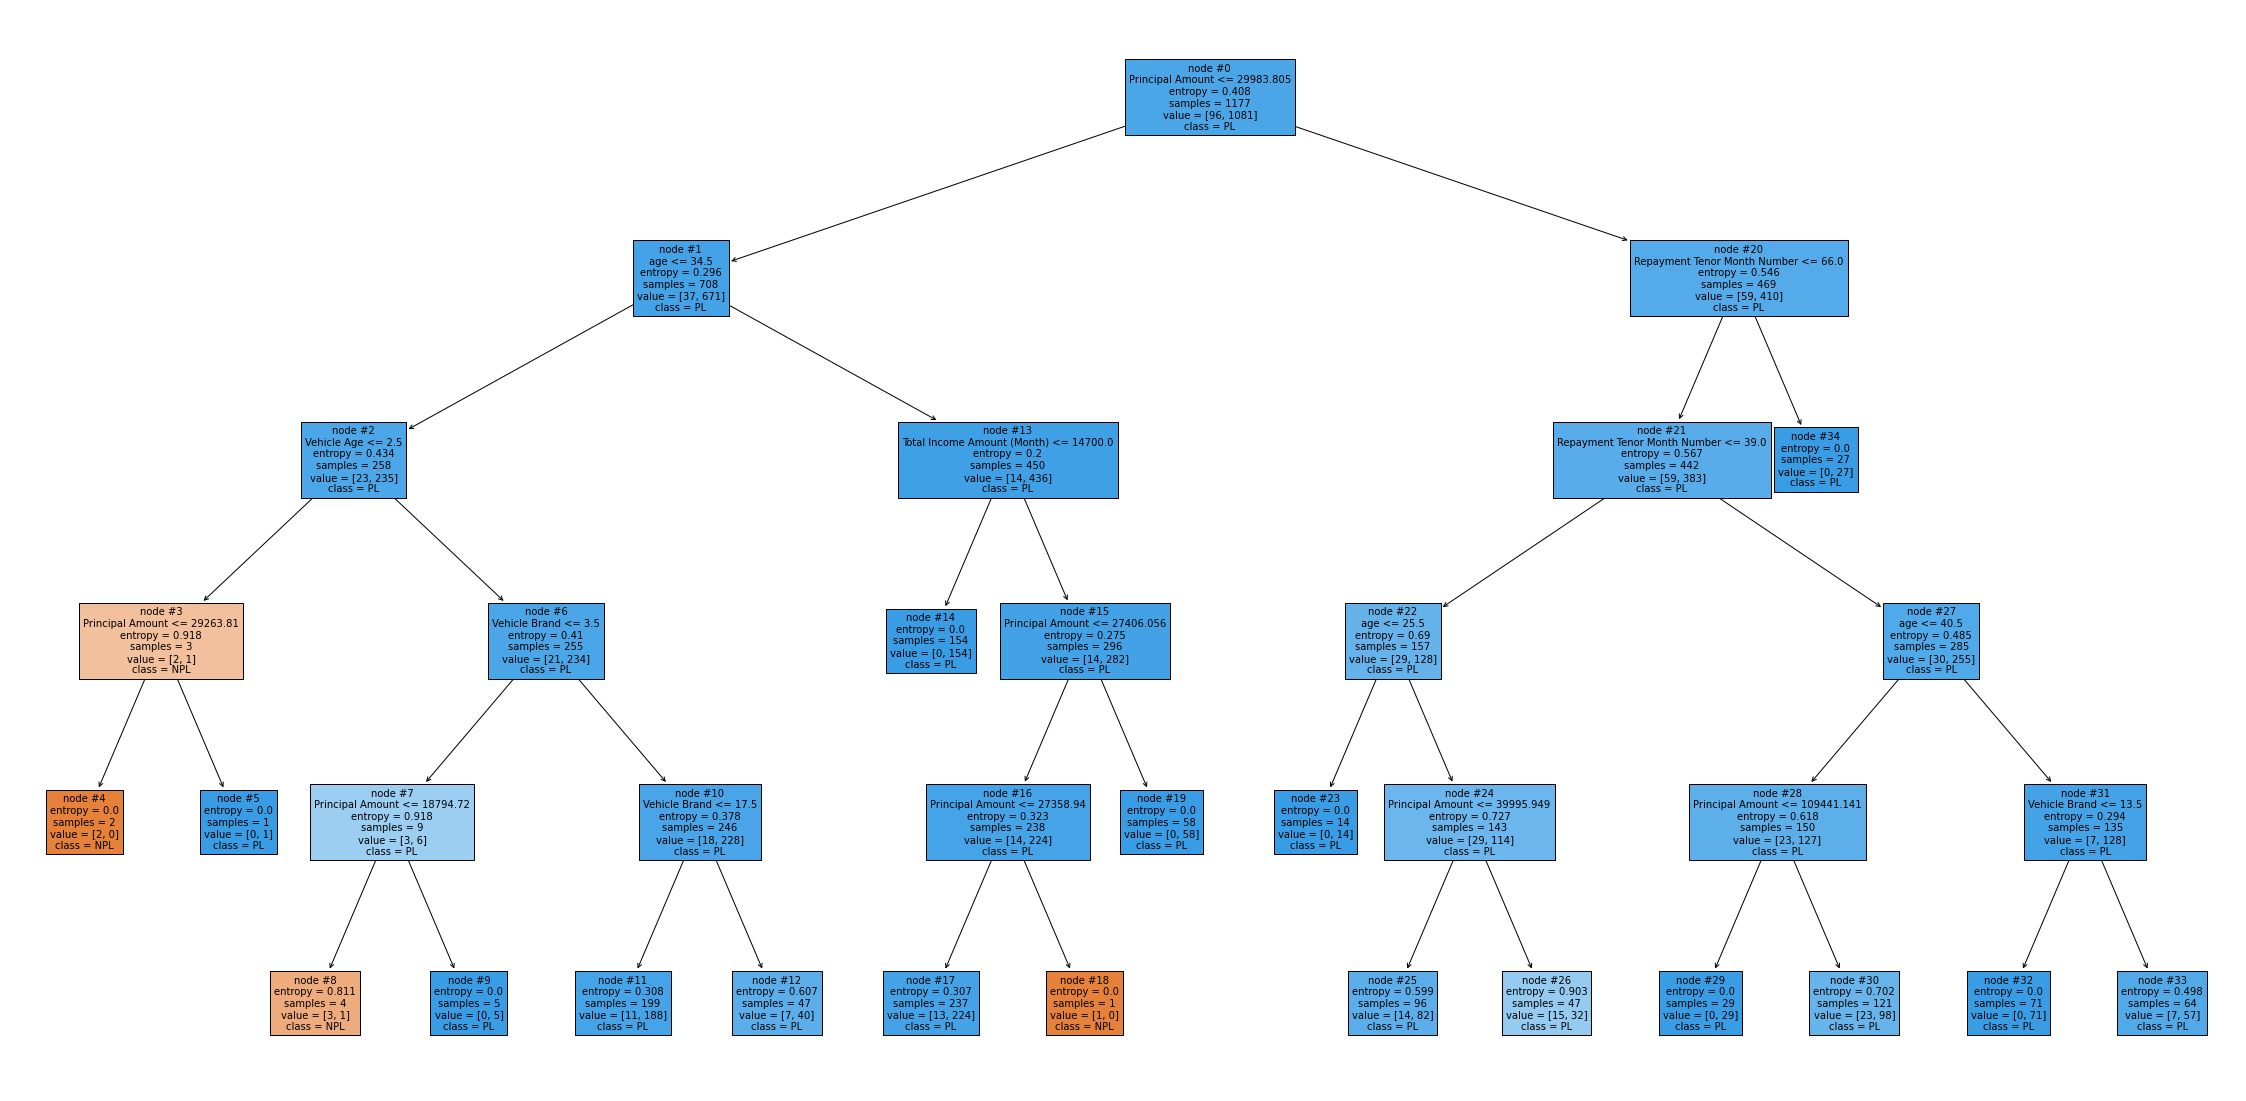

In [ ]:
from sklearn import tree
fig = plt.figure(figsize=(40,20))
_ = tree.plot_tree(classifier, 
                   feature_names=['Principal Amount', 'Repayment Tenor Month Number', 'Gender','Occupation Description', 'Total Income Amount (Month)', 'Collateral Type Code', 'Vehicle Brand', 'age', 'Vehicle Age'],  
                   class_names=['NPL','PL'],
                   filled=True,node_ids=True, fontsize=10)

In [ ]:
import graphviz

ModuleNotFoundError: No module named 'graphviz'

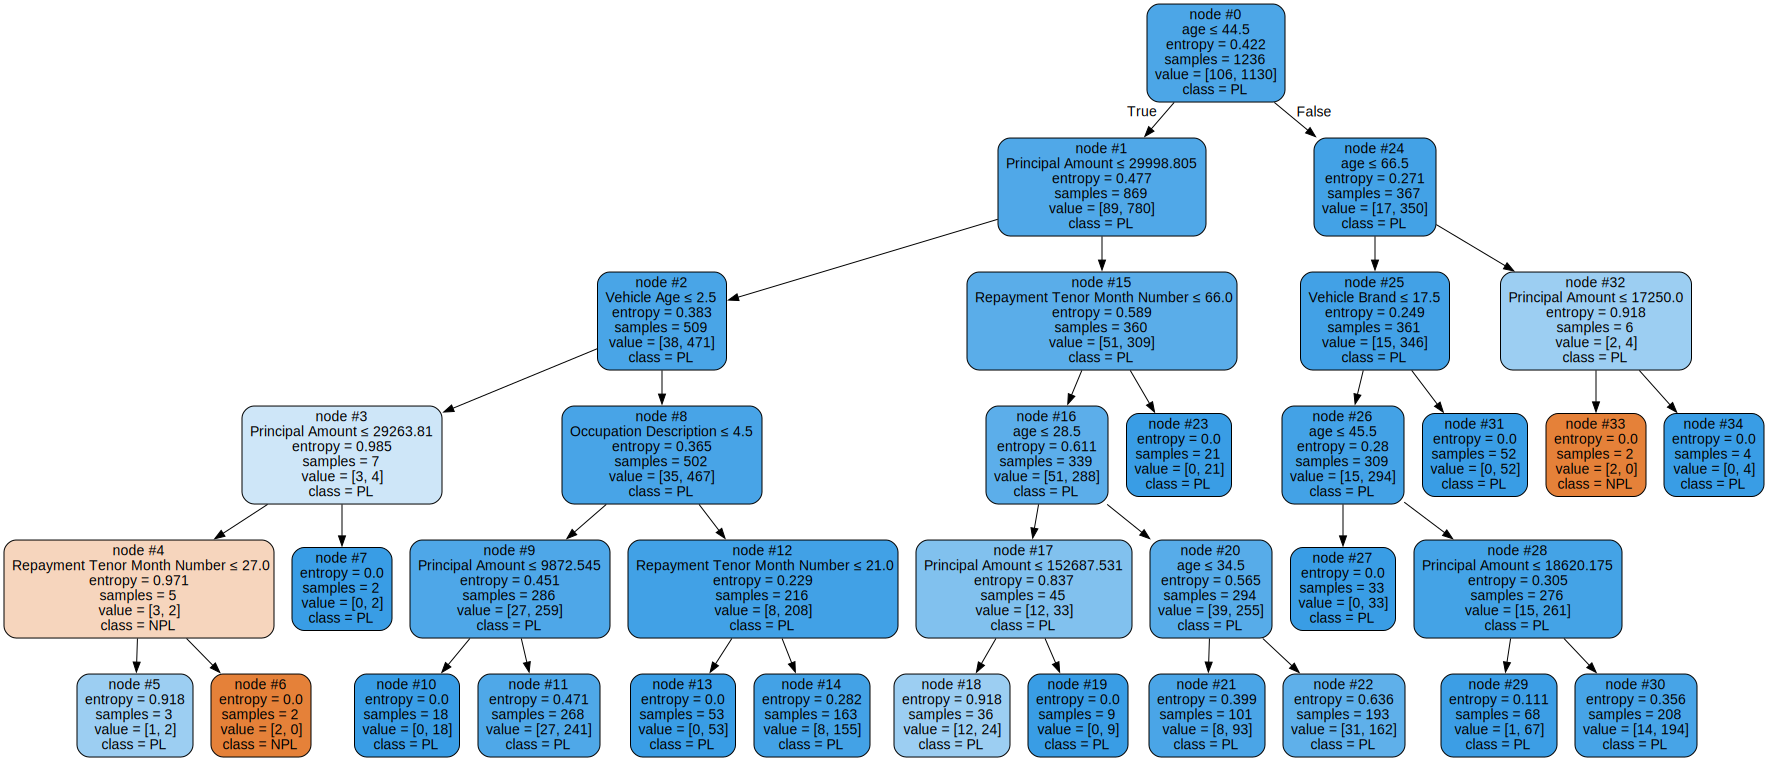

In [ ]:
dot_data = tree.export_graphviz(classifier, out_file=None,
                                feature_names=['Principal Amount', 'Repayment Tenor Month Number', 'Gender','Occupation Description', 'Total Income Amount (Month)', 'Collateral Type Code', 'Vehicle Brand', 'age', 'Vehicle Age'],  
                                class_names=['NPL','PL'],
                                filled=True,node_ids=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

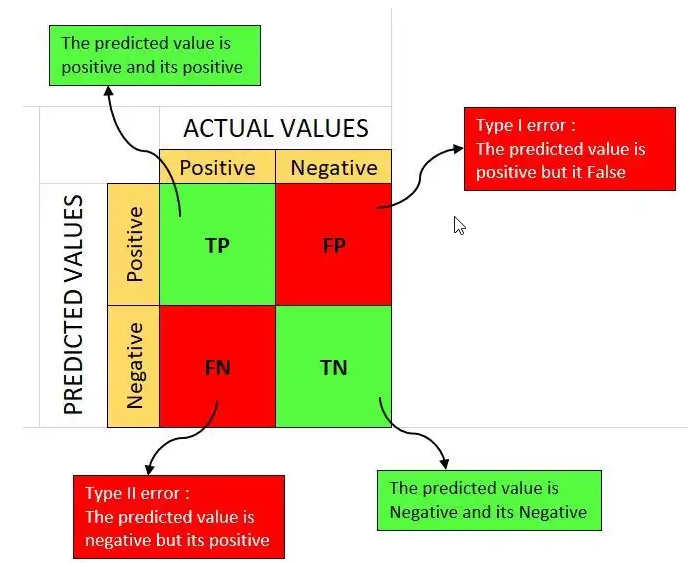


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix : \n',cm)

cr = classification_report(y_test, y_pred)
print('Classification report  \n',cr)

Confusion matrix : 
 [[  0  45]
 [  2 458]]
Classification report  
               precision    recall  f1-score   support

         NPL       0.00      0.00      0.00        45
          PL       0.91      1.00      0.95       460

    accuracy                           0.91       505
   macro avg       0.46      0.50      0.48       505
weighted avg       0.83      0.91      0.87       505



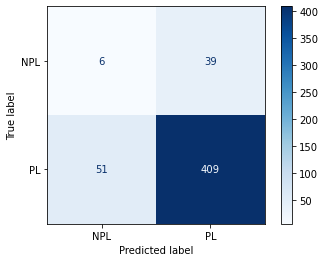

In [ ]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix, plot_roc_curve
plot_confusion_matrix(model, X_test, y_test, cmap='Blues', values_format='d')

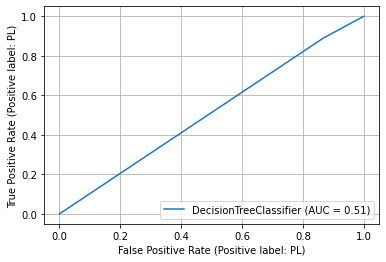

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(model, X_test, y_test)
plt.grid()